In [1]:
#libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns  
sns.set(color_codes=True)

In [2]:
from sklearn.model_selection import train_test_split        
from sklearn.ensemble import RandomForestClassifier as Rf     
from sklearn.preprocessing import LabelEncoder              

In [4]:
#results report
from sklearn.metrics import confusion_matrix        
from sklearn.metrics import accuracy_score            
from sklearn.metrics import classification_report

In [10]:
df = pd.read_csv("train/train.csv")

In [11]:
df.head()

,ID,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,...,Job Code,Job,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits,Class
0,9248,Fiscal,2017,3,Human Welfare & Neighborhood Development,DSS,HSA Human Services Agency,535,"SEIU - Human Services, Local 1021",2900,...,2905,Senior Eligibility Worker,41351,0.00,240.00,11896.36,13765.55,5248.43,30910.34,2
1,44541,Fiscal,2014,6,General Administration & Finance,ASR,ASR Assessor / Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",4200,...,4222,Sr Personal Property Auditor,41792,0.00,400.00,15429.94,9337.37,5599.01,30366.32,2
2,47031,Fiscal,2014,3,Human Welfare & Neighborhood Development,DSS,HSA Human Services Agency,535,"SEIU - Human Services, Local 1021",2900,...,2910,Social Worker,9357,0.00,1080.00,9682.00,8848.03,3463.92,21993.95,2
3,139416,Fiscal,2014,1,Public Protection,FIR,FIR Fire Department,798,"Firefighters - Miscellaneous, Local 798",H000,...,H002,Firefighter,28022,25730.46,18414.18,24222.26,13911.13,2416.58,40549.97,3
4,123780,Fiscal,2013,2,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,790,"SEIU - Miscellaneous, Local 1021",1600,...,1224,Pr Payroll & Personnel Clerk,51052,1138.28,2148.11,15437.62,12828.15,7246.54,35512.31,3


In [13]:
df.isnull().sum()

ID                         0
Year Type                  0
Year                       0
Organization Group Code    0
Organization Group         0
Department Code            0
Department                 0
Union Code                 0
Union                      0
Job Family Code            0
Job Family                 0
Job Code                   0
Job                        0
Employee Identifier        0
Overtime                   0
Other Salaries             0
Retirement                 0
Health/Dental              0
Other Benefits             0
Total Benefits             0
Class                      0
dtype: int64

In [14]:
df.dtypes

ID                           int64
Year Type                   object
Year                         int64
Organization Group Code      int64
Organization Group          object
Department Code             object
Department                  object
Union Code                   int64
Union                       object
Job Family Code             object
Job Family                  object
Job Code                    object
Job                         object
Employee Identifier          int64
Overtime                   float64
Other Salaries             float64
Retirement                 float64
Health/Dental              float64
Other Benefits             float64
Total Benefits             float64
Class                        int64
dtype: object

In [16]:
#check columns
df_train.columns

Index(['ID', 'Year Type', 'Year', 'Organization Group Code',
       'Organization Group', 'Department Code', 'Department', 'Union Code',
       'Union', 'Job Family Code', 'Job Family', 'Job Code', 'Job',
       'Employee Identifier', 'Overtime', 'Other Salaries', 'Retirement',
       'Health/Dental', 'Other Benefits', 'Total Benefits', 'Class'],
      dtype='object')

### Item to  Drop
- ID 
- Year Type
- Employee Indentifier 


In [31]:
df = df.drop(['ID' , "Year Type" ,"Employee Identifier"] , axis =1)

In [32]:
df.shape

(149087, 18)

In [20]:
#check the values ic class columns
df["Class"].unique()

array([2, 3, 1])

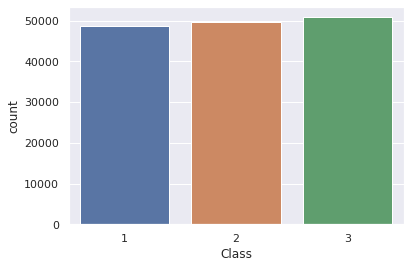

In [23]:
#check plot for class columns
sns.countplot(df['Class'])

In [39]:
#group the df by depart and check the class counts
# print(df.groupby('Department')['Class'].value_counts())
# df['Department']

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,149087.0,2015.072018,1.410452,2013.00,2014.000,2015.00,2016.000,2017.00
Organization Group Code,149087.0,2.976980,1.582080,1.00,2.000,2.00,4.000,7.00
Union Code,149087.0,491.154963,333.914881,1.00,216.000,535.00,790.000,990.00
Overtime,149087.0,4511.488439,11361.792998,-12308.66,0.000,0.00,2872.240,227313.62
Other Salaries,149087.0,3754.638895,7516.445237,-19131.10,0.000,698.35,4558.190,336726.34
Retirement,149087.0,12632.395320,9657.913757,-28723.19,3228.975,12839.71,19137.745,101306.01
Health/Dental,149087.0,9058.531893,5024.486147,-2946.53,4274.930,12137.40,12828.180,22052.15
Other Benefits,149087.0,4720.552627,3933.772085,-9857.74,1578.475,4395.51,6943.835,36815.39
Total Benefits,149087.0,26411.479840,16893.424789,-19814.44,9313.965,30311.56,38510.300,138503.52
Class,149087.0,2.014347,0.816750,1.00,1.000,2.00,3.000,3.00


In [41]:
#Unique Value in Job Column
df['Job'].unique()

array(['Senior Eligibility Worker', 'Sr Personal Property Auditor',
       'Social Worker', ..., 'Chief Deputy Sheriff (PERS)',
       'Parking Hearing Supervisor', 'Asst Chf, Bur Clm Invest&Admin'],
      dtype=object)

In [40]:
# df.groupby('Job')['Union'].max()

In [42]:
# No. of job by post
df['Job'].value_counts()[:10]

Transit Operator                9092
Special Nurse                   5321
Registered Nurse                4653
Police Officer 3                2936
Firefighter                     2931
Custodian                       2926
Public Svc Aide-Public Works    2922
Public Service Trainee          2918
Police Officer                  2630
Recreation Leader               2574
Name: Job, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

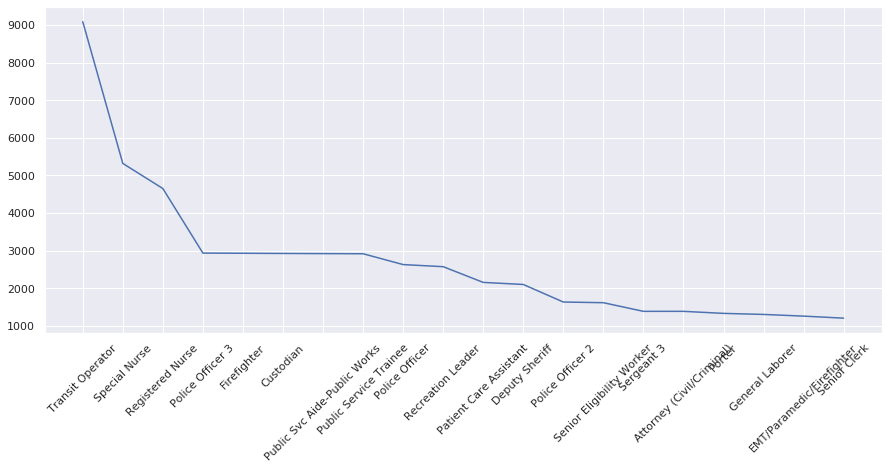

In [43]:
#check graph for first few job types
plt.figure(figsize=(15,6))
plt.plot(df_train['Job'].value_counts()[:20])
plt.xticks(rotation=45)

In [51]:
# lets sorts job count
df["Job"].value_counts().sort_values(ascending = False)

Transit Operator                            9092
Special Nurse                               5321
Registered Nurse                            4653
Police Officer 3                            2936
Firefighter                                 2931
                                            ... 
Chief Deputy Sheriff (PERS)                    1
Transportation Safety Specialist               1
Musm Exhibit Packer & Repairer                 1
Manager III, Municipal Transportation Ag       1
Harbor Office Assistant (OCII)                 1
Name: Job, Length: 1146, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

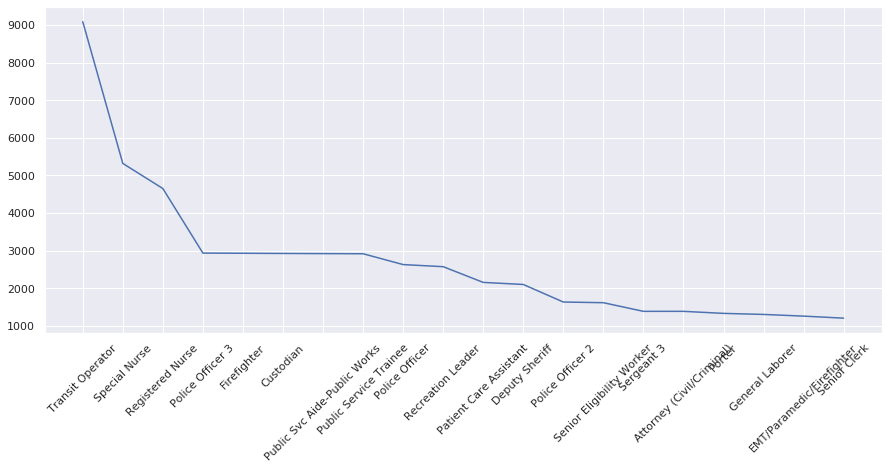

In [52]:
plt.figure(figsize=(15,6))
plt.plot(df_train['Job'].value_counts().sort_values(ascending = False)[:20])
plt.xticks(rotation=45)

### Shows the jobs with more posts
   - It gives a brief summary of most jobs

In [54]:
df['Union'].value_counts()[:10]

SEIU - Miscellaneous, Local 1021                      42544
Prof & Tech Engineers - Miscellaneous, Local 21       19292
SEIU - Staff and Per Diem Nurses, Local 1021          11187
Police Officers' Association                           9812
Transport Workers - Transit Operators, Local 250-A     9092
SEIU - Health Workers, Local 1021                      8275
SEIU - Human Services, Local 1021                      6441
Firefighters - Miscellaneous, Local 798                5517
Municipal Executive Association - Miscellaneous        4402
Laborers, Local 261                                    3692
Name: Union, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

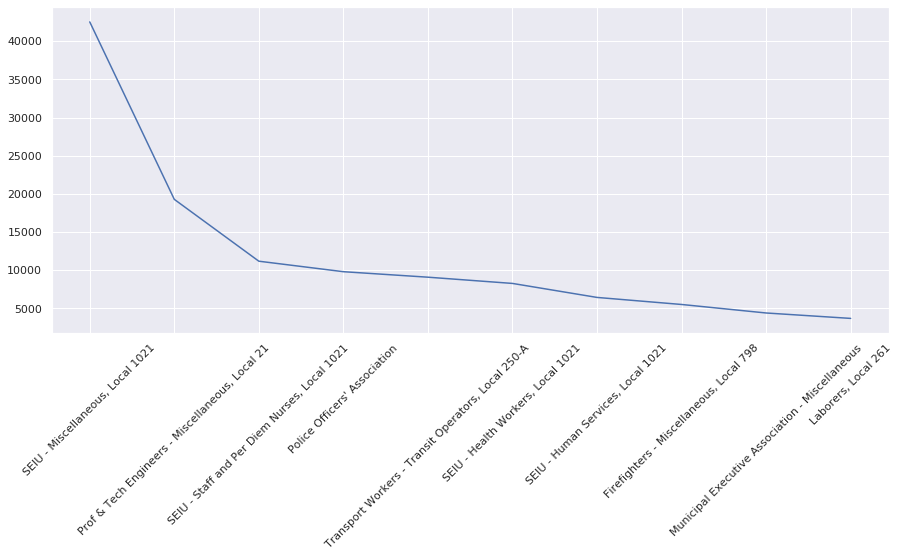

In [55]:
plt.figure(figsize=(15,6))
plt.plot(df_train['Union'].value_counts().sort_values(ascending = False)[:10])
plt.xticks(rotation=45)

### Summary of top 20 Unions 
   - A brief of unions with most job positions

In [61]:
#check the mean of overtime earned in each class
df.groupby('Class')['Overtime'].mean()

Class
1     480.957099
2    4363.602698
3    8516.718521
Name: Overtime, dtype: float64

In [63]:
# plt.figure(figsize=(12,6))
# sns.countplot(df['Job'])
# plt.xticks(rotation=45)

In [65]:
# Check in each class the job with more posts
df.groupby("Class")['Job'].max()

Class
1                Youth Comm Advisor
2                Youth Comm Advisor
3    Worker's Compensation Adjuster
Name: Job, dtype: object

#### lets Filter the youths data

In [66]:
df_youth=df.loc[df_train['Job'] == "Youth Comm Advisor"]

In [70]:
#check benefits for youthes in each class
df_youth.groupby("Class")["Total Benefits"].mean()


Class
1     7120.025
2    23886.660
Name: Total Benefits, dtype: float64

### WE observed that youths in the 3rd class has no benfits whle that in 2nd has much

In [80]:
#check the retirement by class
df_youth.groupby("Class")["Retirement"].mean()
# df_youth['Class'].unique()

Class
1    3090.405
2    9341.930
Name: Retirement, dtype: float64

### Second class has also more retiurement earning than the otheres

In [81]:
df_train.groupby("Class")["Health/Dental"].mean()

Class
1     2810.023086
2    11475.992954
3    12683.961075
Name: Health/Dental, dtype: float64

### Most people from the 3rd class has health problenm

In [83]:
df.dtypes

Year                         int64
Organization Group Code      int64
Organization Group          object
Department Code             object
Department                  object
Union Code                   int64
Union                       object
Job Family Code             object
Job Family                  object
Job Code                    object
Job                         object
Overtime                   float64
Other Salaries             float64
Retirement                 float64
Health/Dental              float64
Other Benefits             float64
Total Benefits             float64
Class                        int64
dtype: object

In [82]:
df_train.columns

Index(['ID', 'Year Type', 'Year', 'Organization Group Code',
       'Organization Group', 'Department Code', 'Department', 'Union Code',
       'Union', 'Job Family Code', 'Job Family', 'Job Code', 'Job',
       'Employee Identifier', 'Overtime', 'Other Salaries', 'Retirement',
       'Health/Dental', 'Other Benefits', 'Total Benefits', 'Class'],
      dtype='object')

## Label Encoding
- Organization Group
- Department
- Union
- Job Family
- Job Family Code
- Job Code etc

In [87]:
#label encode the columns with object dtype
le = LabelEncoder()
for col in df.columns[df.dtypes == object]:
    df[col] = le.fit_transform(df[col])

In [89]:
df.head()

,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits,Class
0,2017,3,4,22,34,535,61,18,21,373,883,0.00,240.00,11896.36,13765.55,5248.43,30910.34,2
1,2014,6,2,5,5,21,55,25,6,509,1007,0.00,400.00,15429.94,9337.37,5599.01,30366.32,2
2,2014,3,4,22,34,535,61,18,21,377,957,0.00,1080.00,9682.00,8848.03,3463.92,21993.95,2
3,2014,1,5,28,27,798,18,53,17,1096,442,25730.46,18414.18,24222.26,13911.13,2416.58,40549.97,3
4,2013,2,6,37,39,790,62,6,34,60,782,1138.28,2148.11,15437.62,12828.15,7246.54,35512.31,3


In [157]:
#get the training df
X = df.drop('Class' , axis =1)

In [156]:
#get the labels
y = df["Class"]

In [93]:
#split the data into 80 to 20
train_X,test_X,train_y, test_y =train_test_split(X, y , test_size = 0.2,random_state = 0)

In [94]:
#initialize the model
rf = Rf(n_estimators =100)

In [95]:
#train the modekl
rf.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [97]:
#get prediction for xtest
pred = rf.predict(test_X)

In [100]:
#check conf.matrix
print(f'Confusion Matrix: \n {confusion_matrix(test_y,pred)}')

Confusion Matrix: 
 [[9798   82    2]
 [ 103 9651   93]
 [   7  117 9965]]


In [99]:
print(f"Train Accuracy Score : {accuracy_score(test_y,predict_y)}")

Train Accuracy Score : 0.9864511368971762


In [101]:
print(f'Classification Report : \n\n {classification_report(test_y,pred)}')

Classification Report : 

               precision    recall  f1-score   support

           1       0.99      0.99      0.99      9882
           2       0.98      0.98      0.98      9847
           3       0.99      0.99      0.99     10089

    accuracy                           0.99     29818
   macro avg       0.99      0.99      0.99     29818
weighted avg       0.99      0.99      0.99     29818



## Lets Try Do cross validation usinsing the xgboost
- We will the train using the following models
        - RandomForestClassifier
        - XgbClassfier
        - Decisontreeclassifier
        - Naivebayes --Multinomialnb
        - lgbmClassfiear
        - catboostclassier
        
        
- This will help uis check score of various models

In [103]:
from sklearn.model_selection import cross_val_score 
#lets check 

In [158]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 50)
valid = cross_val_score(random  , X , y , cv= 10)
    
print(f"Results for 10 folds are    {valid}")
print(f"Means Score is   {valid.mean()}")
print(f"STD is {valid.std()}")


Results for 10 folds are    [0.98558111 0.98604963 0.98792676 0.9880609  0.98618192 0.98712101
 0.98906627 0.98611484 0.9868527  0.98651731]
Means Score is   0.9869472442295107
STD is 0.0010423334179370635


### Cross Validation are almosts same thsu no chances for over/under fitting

In [127]:
#import the modes
import sys
sys.path.append("/usr/local/lib/python3.7/dist-packages")
# !pip install lightgbm
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier ,AdaBoostClassifier , GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import MultinomialNB

In [166]:
models = [XGBClassifier() ,RandomForestClassifier() ,ExtraTreesClassifier() ,AdaBoostClassifier() , GradientBoostingClassifier(),\
         DecisionTreeClassifier() ,LGBMClassifier()  ,CatBoostClassifier() , MultinomialNB()]


#create model lists
# xgb , rand , extra , ada , grad ,dec , lgb , cat , mult = [[] for x in range(9)]
model names
modellist = ["xgb" , "rand" , "extra" , "ada" , "grad" ,"dec" , "lgb" , "cat" , "mult"]


results = pd.DataFrame()
for mod ,name in zip(models , modellist):
    valid = cross_val_score(mod  , X , y , cv = 10)
    results[name] = valid
    


/opt/anaconda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: Future

Learning rate set to 0.101586
0:	learn: 0.9377006	total: 214ms	remaining: 3m 33s
1:	learn: 0.8154220	total: 312ms	remaining: 2m 35s
2:	learn: 0.7181703	total: 418ms	remaining: 2m 18s
3:	learn: 0.6395328	total: 529ms	remaining: 2m 11s
4:	learn: 0.5756329	total: 651ms	remaining: 2m 9s
5:	learn: 0.5224170	total: 763ms	remaining: 2m 6s
6:	learn: 0.4770435	total: 885ms	remaining: 2m 5s
7:	learn: 0.4375419	total: 997ms	remaining: 2m 3s
8:	learn: 0.4022041	total: 1.11s	remaining: 2m 2s
9:	learn: 0.3707762	total: 1.23s	remaining: 2m 1s
10:	learn: 0.3438963	total: 1.34s	remaining: 2m
11:	learn: 0.3211229	total: 1.45s	remaining: 1m 59s
12:	learn: 0.2997634	total: 1.57s	remaining: 1m 59s
13:	learn: 0.2808687	total: 1.7s	remaining: 1m 59s
14:	learn: 0.2642437	total: 1.81s	remaining: 1m 59s
15:	learn: 0.2491421	total: 1.93s	remaining: 1m 58s
16:	learn: 0.2364829	total: 2.05s	remaining: 1m 58s
17:	learn: 0.2243857	total: 2.17s	remaining: 1m 58s
18:	learn: 0.2133906	total: 2.29s	remaining: 1m 58s
19:

158:	learn: 0.0547297	total: 18.4s	remaining: 1m 37s
159:	learn: 0.0545338	total: 18.5s	remaining: 1m 37s
160:	learn: 0.0543637	total: 18.6s	remaining: 1m 36s
161:	learn: 0.0542624	total: 18.7s	remaining: 1m 36s
162:	learn: 0.0540521	total: 18.8s	remaining: 1m 36s
163:	learn: 0.0539249	total: 18.9s	remaining: 1m 36s
164:	learn: 0.0537728	total: 19s	remaining: 1m 36s
165:	learn: 0.0536973	total: 19.2s	remaining: 1m 36s
166:	learn: 0.0535577	total: 19.3s	remaining: 1m 36s
167:	learn: 0.0534976	total: 19.4s	remaining: 1m 36s
168:	learn: 0.0532745	total: 19.5s	remaining: 1m 35s
169:	learn: 0.0530841	total: 19.6s	remaining: 1m 35s
170:	learn: 0.0530062	total: 19.7s	remaining: 1m 35s
171:	learn: 0.0527445	total: 19.8s	remaining: 1m 35s
172:	learn: 0.0525917	total: 20s	remaining: 1m 35s
173:	learn: 0.0525110	total: 20.1s	remaining: 1m 35s
174:	learn: 0.0523738	total: 20.2s	remaining: 1m 35s
175:	learn: 0.0522804	total: 20.3s	remaining: 1m 35s
176:	learn: 0.0521371	total: 20.4s	remaining: 1m 3

314:	learn: 0.0406299	total: 35.9s	remaining: 1m 18s
315:	learn: 0.0406137	total: 36s	remaining: 1m 17s
316:	learn: 0.0405794	total: 36.1s	remaining: 1m 17s
317:	learn: 0.0405382	total: 36.2s	remaining: 1m 17s
318:	learn: 0.0404620	total: 36.3s	remaining: 1m 17s
319:	learn: 0.0404493	total: 36.5s	remaining: 1m 17s
320:	learn: 0.0403784	total: 36.6s	remaining: 1m 17s
321:	learn: 0.0403465	total: 36.7s	remaining: 1m 17s
322:	learn: 0.0403141	total: 36.8s	remaining: 1m 17s
323:	learn: 0.0402657	total: 36.9s	remaining: 1m 16s
324:	learn: 0.0402459	total: 37s	remaining: 1m 16s
325:	learn: 0.0402124	total: 37.1s	remaining: 1m 16s
326:	learn: 0.0401463	total: 37.3s	remaining: 1m 16s
327:	learn: 0.0400910	total: 37.4s	remaining: 1m 16s
328:	learn: 0.0400107	total: 37.5s	remaining: 1m 16s
329:	learn: 0.0399507	total: 37.6s	remaining: 1m 16s
330:	learn: 0.0399072	total: 37.8s	remaining: 1m 16s
331:	learn: 0.0398274	total: 37.9s	remaining: 1m 16s
332:	learn: 0.0397973	total: 38s	remaining: 1m 16s

472:	learn: 0.0347896	total: 53.9s	remaining: 1m
473:	learn: 0.0347819	total: 54s	remaining: 59.9s
474:	learn: 0.0347718	total: 54.1s	remaining: 59.8s
475:	learn: 0.0347561	total: 54.2s	remaining: 59.7s
476:	learn: 0.0347379	total: 54.3s	remaining: 59.6s
477:	learn: 0.0346935	total: 54.5s	remaining: 59.5s
478:	learn: 0.0346495	total: 54.6s	remaining: 59.4s
479:	learn: 0.0346121	total: 54.7s	remaining: 59.2s
480:	learn: 0.0345907	total: 54.8s	remaining: 59.1s
481:	learn: 0.0345598	total: 54.9s	remaining: 59s
482:	learn: 0.0345467	total: 55s	remaining: 58.9s
483:	learn: 0.0345289	total: 55.1s	remaining: 58.8s
484:	learn: 0.0345124	total: 55.3s	remaining: 58.7s
485:	learn: 0.0344774	total: 55.4s	remaining: 58.6s
486:	learn: 0.0344681	total: 55.5s	remaining: 58.4s
487:	learn: 0.0344368	total: 55.6s	remaining: 58.3s
488:	learn: 0.0344009	total: 55.7s	remaining: 58.2s
489:	learn: 0.0343751	total: 55.8s	remaining: 58.1s
490:	learn: 0.0343537	total: 55.9s	remaining: 58s
491:	learn: 0.0343380	t

631:	learn: 0.0311388	total: 1m 11s	remaining: 41.8s
632:	learn: 0.0311249	total: 1m 11s	remaining: 41.6s
633:	learn: 0.0310935	total: 1m 11s	remaining: 41.5s
634:	learn: 0.0310739	total: 1m 12s	remaining: 41.4s
635:	learn: 0.0310557	total: 1m 12s	remaining: 41.3s
636:	learn: 0.0310332	total: 1m 12s	remaining: 41.2s
637:	learn: 0.0310154	total: 1m 12s	remaining: 41.1s
638:	learn: 0.0310029	total: 1m 12s	remaining: 41s
639:	learn: 0.0309936	total: 1m 12s	remaining: 40.8s
640:	learn: 0.0309600	total: 1m 12s	remaining: 40.7s
641:	learn: 0.0309246	total: 1m 12s	remaining: 40.6s
642:	learn: 0.0309144	total: 1m 12s	remaining: 40.5s
643:	learn: 0.0308924	total: 1m 13s	remaining: 40.4s
644:	learn: 0.0308748	total: 1m 13s	remaining: 40.3s
645:	learn: 0.0308702	total: 1m 13s	remaining: 40.1s
646:	learn: 0.0308537	total: 1m 13s	remaining: 40s
647:	learn: 0.0308398	total: 1m 13s	remaining: 39.9s
648:	learn: 0.0307961	total: 1m 13s	remaining: 39.8s
649:	learn: 0.0307841	total: 1m 13s	remaining: 39.

787:	learn: 0.0282595	total: 1m 29s	remaining: 24s
788:	learn: 0.0282443	total: 1m 29s	remaining: 23.9s
789:	learn: 0.0282292	total: 1m 29s	remaining: 23.8s
790:	learn: 0.0282022	total: 1m 29s	remaining: 23.7s
791:	learn: 0.0281908	total: 1m 29s	remaining: 23.6s
792:	learn: 0.0281663	total: 1m 29s	remaining: 23.4s
793:	learn: 0.0281457	total: 1m 29s	remaining: 23.3s
794:	learn: 0.0281401	total: 1m 30s	remaining: 23.2s
795:	learn: 0.0281374	total: 1m 30s	remaining: 23.1s
796:	learn: 0.0281161	total: 1m 30s	remaining: 23s
797:	learn: 0.0280974	total: 1m 30s	remaining: 22.9s
798:	learn: 0.0280887	total: 1m 30s	remaining: 22.8s
799:	learn: 0.0280828	total: 1m 30s	remaining: 22.6s
800:	learn: 0.0280464	total: 1m 30s	remaining: 22.5s
801:	learn: 0.0280380	total: 1m 30s	remaining: 22.4s
802:	learn: 0.0280258	total: 1m 30s	remaining: 22.3s
803:	learn: 0.0279992	total: 1m 31s	remaining: 22.2s
804:	learn: 0.0279677	total: 1m 31s	remaining: 22.1s
805:	learn: 0.0279532	total: 1m 31s	remaining: 22s

943:	learn: 0.0262421	total: 1m 46s	remaining: 6.32s
944:	learn: 0.0262360	total: 1m 46s	remaining: 6.21s
945:	learn: 0.0262155	total: 1m 46s	remaining: 6.09s
946:	learn: 0.0261999	total: 1m 46s	remaining: 5.98s
947:	learn: 0.0261674	total: 1m 46s	remaining: 5.87s
948:	learn: 0.0261521	total: 1m 47s	remaining: 5.75s
949:	learn: 0.0261356	total: 1m 47s	remaining: 5.64s
950:	learn: 0.0261232	total: 1m 47s	remaining: 5.53s
951:	learn: 0.0261188	total: 1m 47s	remaining: 5.42s
952:	learn: 0.0261107	total: 1m 47s	remaining: 5.3s
953:	learn: 0.0261045	total: 1m 47s	remaining: 5.19s
954:	learn: 0.0260781	total: 1m 47s	remaining: 5.08s
955:	learn: 0.0260685	total: 1m 47s	remaining: 4.96s
956:	learn: 0.0260664	total: 1m 47s	remaining: 4.85s
957:	learn: 0.0260622	total: 1m 48s	remaining: 4.74s
958:	learn: 0.0260503	total: 1m 48s	remaining: 4.63s
959:	learn: 0.0260313	total: 1m 48s	remaining: 4.51s
960:	learn: 0.0260247	total: 1m 48s	remaining: 4.4s
961:	learn: 0.0260181	total: 1m 48s	remaining: 4

101:	learn: 0.0675205	total: 11.6s	remaining: 1m 41s
102:	learn: 0.0672101	total: 11.7s	remaining: 1m 41s
103:	learn: 0.0668092	total: 11.8s	remaining: 1m 41s
104:	learn: 0.0666516	total: 11.9s	remaining: 1m 41s
105:	learn: 0.0662825	total: 12s	remaining: 1m 41s
106:	learn: 0.0659714	total: 12.1s	remaining: 1m 41s
107:	learn: 0.0654773	total: 12.3s	remaining: 1m 41s
108:	learn: 0.0649813	total: 12.4s	remaining: 1m 41s
109:	learn: 0.0647132	total: 12.5s	remaining: 1m 40s
110:	learn: 0.0645551	total: 12.6s	remaining: 1m 40s
111:	learn: 0.0644336	total: 12.7s	remaining: 1m 40s
112:	learn: 0.0641637	total: 12.8s	remaining: 1m 40s
113:	learn: 0.0640119	total: 12.9s	remaining: 1m 40s
114:	learn: 0.0637337	total: 13s	remaining: 1m 40s
115:	learn: 0.0635104	total: 13.1s	remaining: 1m 40s
116:	learn: 0.0632631	total: 13.2s	remaining: 1m 39s
117:	learn: 0.0629795	total: 13.4s	remaining: 1m 39s
118:	learn: 0.0624628	total: 13.5s	remaining: 1m 39s
119:	learn: 0.0620505	total: 13.6s	remaining: 1m 3

257:	learn: 0.0438407	total: 29.1s	remaining: 1m 23s
258:	learn: 0.0437230	total: 29.2s	remaining: 1m 23s
259:	learn: 0.0436807	total: 29.3s	remaining: 1m 23s
260:	learn: 0.0436482	total: 29.4s	remaining: 1m 23s
261:	learn: 0.0434807	total: 29.5s	remaining: 1m 23s
262:	learn: 0.0434310	total: 29.6s	remaining: 1m 23s
263:	learn: 0.0433611	total: 29.8s	remaining: 1m 22s
264:	learn: 0.0433105	total: 29.9s	remaining: 1m 22s
265:	learn: 0.0432469	total: 30s	remaining: 1m 22s
266:	learn: 0.0432052	total: 30.1s	remaining: 1m 22s
267:	learn: 0.0430733	total: 30.2s	remaining: 1m 22s
268:	learn: 0.0430347	total: 30.3s	remaining: 1m 22s
269:	learn: 0.0429842	total: 30.4s	remaining: 1m 22s
270:	learn: 0.0429150	total: 30.5s	remaining: 1m 22s
271:	learn: 0.0428593	total: 30.6s	remaining: 1m 22s
272:	learn: 0.0428302	total: 30.8s	remaining: 1m 21s
273:	learn: 0.0428061	total: 30.9s	remaining: 1m 21s
274:	learn: 0.0427852	total: 31s	remaining: 1m 21s
275:	learn: 0.0427557	total: 31.1s	remaining: 1m 2

414:	learn: 0.0360899	total: 46.7s	remaining: 1m 5s
415:	learn: 0.0360731	total: 46.8s	remaining: 1m 5s
416:	learn: 0.0360649	total: 46.9s	remaining: 1m 5s
417:	learn: 0.0360365	total: 47s	remaining: 1m 5s
418:	learn: 0.0360299	total: 47.1s	remaining: 1m 5s
419:	learn: 0.0360160	total: 47.2s	remaining: 1m 5s
420:	learn: 0.0359953	total: 47.3s	remaining: 1m 5s
421:	learn: 0.0359426	total: 47.4s	remaining: 1m 4s
422:	learn: 0.0359012	total: 47.5s	remaining: 1m 4s
423:	learn: 0.0358776	total: 47.6s	remaining: 1m 4s
424:	learn: 0.0358313	total: 47.7s	remaining: 1m 4s
425:	learn: 0.0358129	total: 47.8s	remaining: 1m 4s
426:	learn: 0.0357694	total: 48s	remaining: 1m 4s
427:	learn: 0.0357584	total: 48.1s	remaining: 1m 4s
428:	learn: 0.0357176	total: 48.2s	remaining: 1m 4s
429:	learn: 0.0356847	total: 48.3s	remaining: 1m 3s
430:	learn: 0.0356695	total: 48.4s	remaining: 1m 3s
431:	learn: 0.0356575	total: 48.5s	remaining: 1m 3s
432:	learn: 0.0356424	total: 48.6s	remaining: 1m 3s
433:	learn: 0.03

575:	learn: 0.0315641	total: 1m 4s	remaining: 47.5s
576:	learn: 0.0315516	total: 1m 4s	remaining: 47.4s
577:	learn: 0.0315342	total: 1m 4s	remaining: 47.3s
578:	learn: 0.0315170	total: 1m 4s	remaining: 47.2s
579:	learn: 0.0314405	total: 1m 4s	remaining: 47s
580:	learn: 0.0313978	total: 1m 5s	remaining: 46.9s
581:	learn: 0.0313557	total: 1m 5s	remaining: 46.8s
582:	learn: 0.0313399	total: 1m 5s	remaining: 46.7s
583:	learn: 0.0312966	total: 1m 5s	remaining: 46.6s
584:	learn: 0.0312801	total: 1m 5s	remaining: 46.5s
585:	learn: 0.0312382	total: 1m 5s	remaining: 46.4s
586:	learn: 0.0312313	total: 1m 5s	remaining: 46.3s
587:	learn: 0.0312223	total: 1m 5s	remaining: 46.1s
588:	learn: 0.0312064	total: 1m 5s	remaining: 46s
589:	learn: 0.0311932	total: 1m 6s	remaining: 45.9s
590:	learn: 0.0311790	total: 1m 6s	remaining: 45.8s
591:	learn: 0.0311508	total: 1m 6s	remaining: 45.7s
592:	learn: 0.0311293	total: 1m 6s	remaining: 45.6s
593:	learn: 0.0310905	total: 1m 6s	remaining: 45.5s
594:	learn: 0.03

732:	learn: 0.0286400	total: 1m 21s	remaining: 29.8s
733:	learn: 0.0286313	total: 1m 21s	remaining: 29.7s
734:	learn: 0.0286252	total: 1m 22s	remaining: 29.6s
735:	learn: 0.0285955	total: 1m 22s	remaining: 29.5s
736:	learn: 0.0285764	total: 1m 22s	remaining: 29.4s
737:	learn: 0.0285436	total: 1m 22s	remaining: 29.2s
738:	learn: 0.0285378	total: 1m 22s	remaining: 29.1s
739:	learn: 0.0285301	total: 1m 22s	remaining: 29s
740:	learn: 0.0285220	total: 1m 22s	remaining: 28.9s
741:	learn: 0.0285161	total: 1m 22s	remaining: 28.8s
742:	learn: 0.0285079	total: 1m 22s	remaining: 28.7s
743:	learn: 0.0284830	total: 1m 23s	remaining: 28.6s
744:	learn: 0.0284764	total: 1m 23s	remaining: 28.4s
745:	learn: 0.0284695	total: 1m 23s	remaining: 28.3s
746:	learn: 0.0284617	total: 1m 23s	remaining: 28.2s
747:	learn: 0.0284515	total: 1m 23s	remaining: 28.1s
748:	learn: 0.0284343	total: 1m 23s	remaining: 28s
749:	learn: 0.0284216	total: 1m 23s	remaining: 27.9s
750:	learn: 0.0284084	total: 1m 23s	remaining: 27.

888:	learn: 0.0263365	total: 1m 38s	remaining: 12.3s
889:	learn: 0.0263259	total: 1m 39s	remaining: 12.2s
890:	learn: 0.0263079	total: 1m 39s	remaining: 12.1s
891:	learn: 0.0262951	total: 1m 39s	remaining: 12s
892:	learn: 0.0262875	total: 1m 39s	remaining: 11.9s
893:	learn: 0.0262804	total: 1m 39s	remaining: 11.8s
894:	learn: 0.0262669	total: 1m 39s	remaining: 11.7s
895:	learn: 0.0262500	total: 1m 39s	remaining: 11.6s
896:	learn: 0.0262429	total: 1m 39s	remaining: 11.5s
897:	learn: 0.0262380	total: 1m 39s	remaining: 11.3s
898:	learn: 0.0262146	total: 1m 39s	remaining: 11.2s
899:	learn: 0.0261991	total: 1m 40s	remaining: 11.1s
900:	learn: 0.0261961	total: 1m 40s	remaining: 11s
901:	learn: 0.0261559	total: 1m 40s	remaining: 10.9s
902:	learn: 0.0261299	total: 1m 40s	remaining: 10.8s
903:	learn: 0.0261187	total: 1m 40s	remaining: 10.7s
904:	learn: 0.0261070	total: 1m 40s	remaining: 10.6s
905:	learn: 0.0260970	total: 1m 40s	remaining: 10.5s
906:	learn: 0.0260735	total: 1m 40s	remaining: 10.

45:	learn: 0.1034143	total: 5.24s	remaining: 1m 48s
46:	learn: 0.1021482	total: 5.34s	remaining: 1m 48s
47:	learn: 0.1006282	total: 5.46s	remaining: 1m 48s
48:	learn: 0.0995670	total: 5.57s	remaining: 1m 48s
49:	learn: 0.0983465	total: 5.68s	remaining: 1m 47s
50:	learn: 0.0971841	total: 5.79s	remaining: 1m 47s
51:	learn: 0.0959520	total: 5.9s	remaining: 1m 47s
52:	learn: 0.0947589	total: 6.02s	remaining: 1m 47s
53:	learn: 0.0932050	total: 6.13s	remaining: 1m 47s
54:	learn: 0.0925860	total: 6.23s	remaining: 1m 47s
55:	learn: 0.0914723	total: 6.35s	remaining: 1m 47s
56:	learn: 0.0909089	total: 6.46s	remaining: 1m 46s
57:	learn: 0.0899642	total: 6.58s	remaining: 1m 46s
58:	learn: 0.0894129	total: 6.68s	remaining: 1m 46s
59:	learn: 0.0885737	total: 6.8s	remaining: 1m 46s
60:	learn: 0.0877922	total: 6.91s	remaining: 1m 46s
61:	learn: 0.0865503	total: 7.03s	remaining: 1m 46s
62:	learn: 0.0857593	total: 7.14s	remaining: 1m 46s
63:	learn: 0.0846709	total: 7.26s	remaining: 1m 46s
64:	learn: 0.0

203:	learn: 0.0483145	total: 22.8s	remaining: 1m 29s
204:	learn: 0.0482320	total: 22.9s	remaining: 1m 28s
205:	learn: 0.0481946	total: 23s	remaining: 1m 28s
206:	learn: 0.0481160	total: 23.1s	remaining: 1m 28s
207:	learn: 0.0480215	total: 23.2s	remaining: 1m 28s
208:	learn: 0.0479136	total: 23.4s	remaining: 1m 28s
209:	learn: 0.0477996	total: 23.5s	remaining: 1m 28s
210:	learn: 0.0477156	total: 23.6s	remaining: 1m 28s
211:	learn: 0.0476588	total: 23.7s	remaining: 1m 28s
212:	learn: 0.0475922	total: 23.8s	remaining: 1m 27s
213:	learn: 0.0474537	total: 23.9s	remaining: 1m 27s
214:	learn: 0.0473378	total: 24s	remaining: 1m 27s
215:	learn: 0.0472489	total: 24.1s	remaining: 1m 27s
216:	learn: 0.0471456	total: 24.2s	remaining: 1m 27s
217:	learn: 0.0470076	total: 24.4s	remaining: 1m 27s
218:	learn: 0.0469338	total: 24.5s	remaining: 1m 27s
219:	learn: 0.0468021	total: 24.6s	remaining: 1m 27s
220:	learn: 0.0467515	total: 24.7s	remaining: 1m 27s
221:	learn: 0.0466937	total: 24.8s	remaining: 1m 2

360:	learn: 0.0383774	total: 40.2s	remaining: 1m 11s
361:	learn: 0.0383414	total: 40.3s	remaining: 1m 11s
362:	learn: 0.0383151	total: 40.4s	remaining: 1m 10s
363:	learn: 0.0382342	total: 40.5s	remaining: 1m 10s
364:	learn: 0.0381905	total: 40.6s	remaining: 1m 10s
365:	learn: 0.0381385	total: 40.7s	remaining: 1m 10s
366:	learn: 0.0381216	total: 40.9s	remaining: 1m 10s
367:	learn: 0.0380887	total: 41s	remaining: 1m 10s
368:	learn: 0.0380158	total: 41.1s	remaining: 1m 10s
369:	learn: 0.0379911	total: 41.2s	remaining: 1m 10s
370:	learn: 0.0379153	total: 41.3s	remaining: 1m 10s
371:	learn: 0.0379075	total: 41.4s	remaining: 1m 9s
372:	learn: 0.0378692	total: 41.5s	remaining: 1m 9s
373:	learn: 0.0378416	total: 41.6s	remaining: 1m 9s
374:	learn: 0.0378085	total: 41.7s	remaining: 1m 9s
375:	learn: 0.0377855	total: 41.8s	remaining: 1m 9s
376:	learn: 0.0377735	total: 41.9s	remaining: 1m 9s
377:	learn: 0.0377208	total: 42.1s	remaining: 1m 9s
378:	learn: 0.0376788	total: 42.2s	remaining: 1m 9s
379

519:	learn: 0.0331856	total: 57.9s	remaining: 53.5s
520:	learn: 0.0331634	total: 58s	remaining: 53.4s
521:	learn: 0.0331390	total: 58.1s	remaining: 53.2s
522:	learn: 0.0330841	total: 58.3s	remaining: 53.1s
523:	learn: 0.0330575	total: 58.4s	remaining: 53s
524:	learn: 0.0330171	total: 58.5s	remaining: 52.9s
525:	learn: 0.0330031	total: 58.6s	remaining: 52.8s
526:	learn: 0.0329897	total: 58.7s	remaining: 52.7s
527:	learn: 0.0329506	total: 58.8s	remaining: 52.6s
528:	learn: 0.0329307	total: 58.9s	remaining: 52.5s
529:	learn: 0.0329153	total: 59s	remaining: 52.3s
530:	learn: 0.0328821	total: 59.1s	remaining: 52.2s
531:	learn: 0.0328578	total: 59.2s	remaining: 52.1s
532:	learn: 0.0328267	total: 59.4s	remaining: 52s
533:	learn: 0.0328020	total: 59.5s	remaining: 51.9s
534:	learn: 0.0327843	total: 59.6s	remaining: 51.8s
535:	learn: 0.0327601	total: 59.7s	remaining: 51.7s
536:	learn: 0.0327103	total: 59.8s	remaining: 51.5s
537:	learn: 0.0326945	total: 59.9s	remaining: 51.4s
538:	learn: 0.032671

679:	learn: 0.0298537	total: 1m 15s	remaining: 35.4s
680:	learn: 0.0298451	total: 1m 15s	remaining: 35.3s
681:	learn: 0.0298269	total: 1m 15s	remaining: 35.2s
682:	learn: 0.0298156	total: 1m 15s	remaining: 35.1s
683:	learn: 0.0298053	total: 1m 15s	remaining: 35s
684:	learn: 0.0297897	total: 1m 15s	remaining: 34.9s
685:	learn: 0.0297616	total: 1m 15s	remaining: 34.8s
686:	learn: 0.0297588	total: 1m 16s	remaining: 34.6s
687:	learn: 0.0297545	total: 1m 16s	remaining: 34.5s
688:	learn: 0.0297145	total: 1m 16s	remaining: 34.4s
689:	learn: 0.0296907	total: 1m 16s	remaining: 34.3s
690:	learn: 0.0296843	total: 1m 16s	remaining: 34.2s
691:	learn: 0.0296544	total: 1m 16s	remaining: 34.1s
692:	learn: 0.0296480	total: 1m 16s	remaining: 34s
693:	learn: 0.0296254	total: 1m 16s	remaining: 33.9s
694:	learn: 0.0296153	total: 1m 16s	remaining: 33.8s
695:	learn: 0.0296054	total: 1m 17s	remaining: 33.6s
696:	learn: 0.0295824	total: 1m 17s	remaining: 33.5s
697:	learn: 0.0295296	total: 1m 17s	remaining: 33.

835:	learn: 0.0273664	total: 1m 34s	remaining: 18.5s
836:	learn: 0.0273586	total: 1m 34s	remaining: 18.4s
837:	learn: 0.0273393	total: 1m 34s	remaining: 18.3s
838:	learn: 0.0273328	total: 1m 34s	remaining: 18.2s
839:	learn: 0.0273219	total: 1m 34s	remaining: 18.1s
840:	learn: 0.0273009	total: 1m 34s	remaining: 17.9s
841:	learn: 0.0272606	total: 1m 35s	remaining: 17.8s
842:	learn: 0.0272450	total: 1m 35s	remaining: 17.7s
843:	learn: 0.0272367	total: 1m 35s	remaining: 17.6s
844:	learn: 0.0272191	total: 1m 35s	remaining: 17.5s
845:	learn: 0.0272070	total: 1m 35s	remaining: 17.4s
846:	learn: 0.0272022	total: 1m 35s	remaining: 17.3s
847:	learn: 0.0271919	total: 1m 35s	remaining: 17.2s
848:	learn: 0.0271853	total: 1m 35s	remaining: 17.1s
849:	learn: 0.0271605	total: 1m 36s	remaining: 17s
850:	learn: 0.0271470	total: 1m 36s	remaining: 16.9s
851:	learn: 0.0271364	total: 1m 36s	remaining: 16.8s
852:	learn: 0.0271167	total: 1m 36s	remaining: 16.7s
853:	learn: 0.0270899	total: 1m 37s	remaining: 1

990:	learn: 0.0253532	total: 1m 55s	remaining: 1.04s
991:	learn: 0.0253478	total: 1m 55s	remaining: 929ms
992:	learn: 0.0253348	total: 1m 55s	remaining: 813ms
993:	learn: 0.0253285	total: 1m 55s	remaining: 697ms
994:	learn: 0.0253092	total: 1m 55s	remaining: 581ms
995:	learn: 0.0252992	total: 1m 55s	remaining: 465ms
996:	learn: 0.0252932	total: 1m 55s	remaining: 349ms
997:	learn: 0.0252768	total: 1m 56s	remaining: 233ms
998:	learn: 0.0252650	total: 1m 56s	remaining: 116ms
999:	learn: 0.0252617	total: 1m 56s	remaining: 0us
Learning rate set to 0.101586
0:	learn: 0.9368056	total: 107ms	remaining: 1m 47s
1:	learn: 0.8142591	total: 231ms	remaining: 1m 55s
2:	learn: 0.7180581	total: 360ms	remaining: 1m 59s
3:	learn: 0.6397352	total: 491ms	remaining: 2m 2s
4:	learn: 0.5756104	total: 613ms	remaining: 2m 2s
5:	learn: 0.5224086	total: 745ms	remaining: 2m 3s
6:	learn: 0.4763433	total: 881ms	remaining: 2m 5s
7:	learn: 0.4368544	total: 1.01s	remaining: 2m 4s
8:	learn: 0.4021618	total: 1.14s	remain

149:	learn: 0.0556274	total: 18.9s	remaining: 1m 47s
150:	learn: 0.0555001	total: 19.1s	remaining: 1m 47s
151:	learn: 0.0553510	total: 19.2s	remaining: 1m 47s
152:	learn: 0.0552797	total: 19.4s	remaining: 1m 47s
153:	learn: 0.0550055	total: 19.5s	remaining: 1m 47s
154:	learn: 0.0548780	total: 19.7s	remaining: 1m 47s
155:	learn: 0.0547103	total: 19.8s	remaining: 1m 47s
156:	learn: 0.0545277	total: 20s	remaining: 1m 47s
157:	learn: 0.0543741	total: 20.2s	remaining: 1m 47s
158:	learn: 0.0541898	total: 20.4s	remaining: 1m 47s
159:	learn: 0.0540415	total: 20.5s	remaining: 1m 47s
160:	learn: 0.0539002	total: 20.7s	remaining: 1m 47s
161:	learn: 0.0537065	total: 20.9s	remaining: 1m 47s
162:	learn: 0.0536725	total: 21.1s	remaining: 1m 48s
163:	learn: 0.0535419	total: 21.2s	remaining: 1m 48s
164:	learn: 0.0532863	total: 21.4s	remaining: 1m 48s
165:	learn: 0.0529821	total: 21.6s	remaining: 1m 48s
166:	learn: 0.0528823	total: 21.8s	remaining: 1m 48s
167:	learn: 0.0527357	total: 21.9s	remaining: 1m

306:	learn: 0.0409842	total: 41.9s	remaining: 1m 34s
307:	learn: 0.0409225	total: 42s	remaining: 1m 34s
308:	learn: 0.0408587	total: 42.1s	remaining: 1m 34s
309:	learn: 0.0408425	total: 42.2s	remaining: 1m 34s
310:	learn: 0.0408251	total: 42.4s	remaining: 1m 33s
311:	learn: 0.0407712	total: 42.5s	remaining: 1m 33s
312:	learn: 0.0406983	total: 42.6s	remaining: 1m 33s
313:	learn: 0.0406345	total: 42.8s	remaining: 1m 33s
314:	learn: 0.0405225	total: 42.9s	remaining: 1m 33s
315:	learn: 0.0404320	total: 43s	remaining: 1m 33s
316:	learn: 0.0404116	total: 43.2s	remaining: 1m 33s
317:	learn: 0.0403640	total: 43.3s	remaining: 1m 32s
318:	learn: 0.0403160	total: 43.5s	remaining: 1m 32s
319:	learn: 0.0402798	total: 43.6s	remaining: 1m 32s
320:	learn: 0.0402130	total: 43.7s	remaining: 1m 32s
321:	learn: 0.0401766	total: 43.9s	remaining: 1m 32s
322:	learn: 0.0401437	total: 44s	remaining: 1m 32s
323:	learn: 0.0401092	total: 44.1s	remaining: 1m 32s
324:	learn: 0.0400652	total: 44.3s	remaining: 1m 31s

462:	learn: 0.0349177	total: 1m 3s	remaining: 1m 13s
463:	learn: 0.0349020	total: 1m 3s	remaining: 1m 13s
464:	learn: 0.0348739	total: 1m 3s	remaining: 1m 13s
465:	learn: 0.0348250	total: 1m 3s	remaining: 1m 13s
466:	learn: 0.0347851	total: 1m 4s	remaining: 1m 13s
467:	learn: 0.0347742	total: 1m 4s	remaining: 1m 12s
468:	learn: 0.0347297	total: 1m 4s	remaining: 1m 12s
469:	learn: 0.0346937	total: 1m 4s	remaining: 1m 12s
470:	learn: 0.0346442	total: 1m 4s	remaining: 1m 12s
471:	learn: 0.0346191	total: 1m 4s	remaining: 1m 12s
472:	learn: 0.0346075	total: 1m 4s	remaining: 1m 12s
473:	learn: 0.0345564	total: 1m 4s	remaining: 1m 11s
474:	learn: 0.0345412	total: 1m 4s	remaining: 1m 11s
475:	learn: 0.0344786	total: 1m 5s	remaining: 1m 11s
476:	learn: 0.0344545	total: 1m 5s	remaining: 1m 11s
477:	learn: 0.0344368	total: 1m 5s	remaining: 1m 11s
478:	learn: 0.0344206	total: 1m 5s	remaining: 1m 11s
479:	learn: 0.0344119	total: 1m 5s	remaining: 1m 11s
480:	learn: 0.0343849	total: 1m 5s	remaining: 

619:	learn: 0.0312727	total: 1m 20s	remaining: 49.5s
620:	learn: 0.0312392	total: 1m 20s	remaining: 49.4s
621:	learn: 0.0312293	total: 1m 21s	remaining: 49.3s
622:	learn: 0.0311994	total: 1m 21s	remaining: 49.1s
623:	learn: 0.0311906	total: 1m 21s	remaining: 49s
624:	learn: 0.0311765	total: 1m 21s	remaining: 48.8s
625:	learn: 0.0311653	total: 1m 21s	remaining: 48.7s
626:	learn: 0.0311489	total: 1m 21s	remaining: 48.5s
627:	learn: 0.0311383	total: 1m 21s	remaining: 48.4s
628:	learn: 0.0311002	total: 1m 21s	remaining: 48.2s
629:	learn: 0.0310941	total: 1m 21s	remaining: 48.1s
630:	learn: 0.0310888	total: 1m 22s	remaining: 48s
631:	learn: 0.0310628	total: 1m 22s	remaining: 47.8s
632:	learn: 0.0310535	total: 1m 22s	remaining: 47.7s
633:	learn: 0.0310240	total: 1m 22s	remaining: 47.5s
634:	learn: 0.0310137	total: 1m 22s	remaining: 47.4s
635:	learn: 0.0309818	total: 1m 22s	remaining: 47.2s
636:	learn: 0.0309689	total: 1m 22s	remaining: 47.1s
637:	learn: 0.0309362	total: 1m 22s	remaining: 47s

776:	learn: 0.0285306	total: 1m 37s	remaining: 28s
777:	learn: 0.0285138	total: 1m 37s	remaining: 27.9s
778:	learn: 0.0284869	total: 1m 37s	remaining: 27.8s
779:	learn: 0.0284514	total: 1m 37s	remaining: 27.6s
780:	learn: 0.0284412	total: 1m 38s	remaining: 27.5s
781:	learn: 0.0284330	total: 1m 38s	remaining: 27.4s
782:	learn: 0.0284220	total: 1m 38s	remaining: 27.2s
783:	learn: 0.0284079	total: 1m 38s	remaining: 27.1s
784:	learn: 0.0283865	total: 1m 38s	remaining: 27s
785:	learn: 0.0283731	total: 1m 38s	remaining: 26.9s
786:	learn: 0.0283547	total: 1m 38s	remaining: 26.7s
787:	learn: 0.0283483	total: 1m 38s	remaining: 26.6s
788:	learn: 0.0283375	total: 1m 38s	remaining: 26.5s
789:	learn: 0.0282984	total: 1m 39s	remaining: 26.3s
790:	learn: 0.0282835	total: 1m 39s	remaining: 26.2s
791:	learn: 0.0282673	total: 1m 39s	remaining: 26.1s
792:	learn: 0.0282575	total: 1m 39s	remaining: 25.9s
793:	learn: 0.0282339	total: 1m 39s	remaining: 25.8s
794:	learn: 0.0282288	total: 1m 39s	remaining: 25.

932:	learn: 0.0264169	total: 1m 54s	remaining: 8.22s
933:	learn: 0.0264122	total: 1m 54s	remaining: 8.1s
934:	learn: 0.0264015	total: 1m 54s	remaining: 7.97s
935:	learn: 0.0263901	total: 1m 54s	remaining: 7.85s
936:	learn: 0.0263833	total: 1m 54s	remaining: 7.72s
937:	learn: 0.0263647	total: 1m 54s	remaining: 7.6s
938:	learn: 0.0263548	total: 1m 55s	remaining: 7.48s
939:	learn: 0.0263125	total: 1m 55s	remaining: 7.35s
940:	learn: 0.0263022	total: 1m 55s	remaining: 7.23s
941:	learn: 0.0262871	total: 1m 55s	remaining: 7.11s
942:	learn: 0.0262697	total: 1m 55s	remaining: 6.98s
943:	learn: 0.0262627	total: 1m 55s	remaining: 6.86s
944:	learn: 0.0262476	total: 1m 55s	remaining: 6.74s
945:	learn: 0.0262435	total: 1m 55s	remaining: 6.61s
946:	learn: 0.0262231	total: 1m 55s	remaining: 6.49s
947:	learn: 0.0262070	total: 1m 56s	remaining: 6.37s
948:	learn: 0.0261938	total: 1m 56s	remaining: 6.24s
949:	learn: 0.0261869	total: 1m 56s	remaining: 6.12s
950:	learn: 0.0261824	total: 1m 56s	remaining: 6

91:	learn: 0.0688474	total: 10.5s	remaining: 1m 43s
92:	learn: 0.0686904	total: 10.6s	remaining: 1m 42s
93:	learn: 0.0683116	total: 10.7s	remaining: 1m 42s
94:	learn: 0.0678165	total: 10.8s	remaining: 1m 42s
95:	learn: 0.0675172	total: 10.9s	remaining: 1m 42s
96:	learn: 0.0671743	total: 11s	remaining: 1m 42s
97:	learn: 0.0668998	total: 11.1s	remaining: 1m 42s
98:	learn: 0.0664982	total: 11.2s	remaining: 1m 42s
99:	learn: 0.0662670	total: 11.3s	remaining: 1m 41s
100:	learn: 0.0660520	total: 11.4s	remaining: 1m 41s
101:	learn: 0.0657542	total: 11.5s	remaining: 1m 41s
102:	learn: 0.0654647	total: 11.6s	remaining: 1m 41s
103:	learn: 0.0652425	total: 11.8s	remaining: 1m 41s
104:	learn: 0.0649861	total: 11.9s	remaining: 1m 41s
105:	learn: 0.0648184	total: 12s	remaining: 1m 40s
106:	learn: 0.0645974	total: 12.1s	remaining: 1m 40s
107:	learn: 0.0644121	total: 12.2s	remaining: 1m 40s
108:	learn: 0.0641471	total: 12.4s	remaining: 1m 41s
109:	learn: 0.0640088	total: 12.5s	remaining: 1m 41s
110:	l

247:	learn: 0.0451462	total: 27.8s	remaining: 1m 24s
248:	learn: 0.0450539	total: 27.9s	remaining: 1m 24s
249:	learn: 0.0449736	total: 28s	remaining: 1m 23s
250:	learn: 0.0448823	total: 28.1s	remaining: 1m 23s
251:	learn: 0.0448439	total: 28.2s	remaining: 1m 23s
252:	learn: 0.0447724	total: 28.3s	remaining: 1m 23s
253:	learn: 0.0447178	total: 28.4s	remaining: 1m 23s
254:	learn: 0.0446554	total: 28.5s	remaining: 1m 23s
255:	learn: 0.0446092	total: 28.6s	remaining: 1m 23s
256:	learn: 0.0445368	total: 28.8s	remaining: 1m 23s
257:	learn: 0.0444345	total: 28.9s	remaining: 1m 23s
258:	learn: 0.0443078	total: 29s	remaining: 1m 22s
259:	learn: 0.0442607	total: 29.1s	remaining: 1m 22s
260:	learn: 0.0441976	total: 29.2s	remaining: 1m 22s
261:	learn: 0.0441328	total: 29.3s	remaining: 1m 22s
262:	learn: 0.0440944	total: 29.4s	remaining: 1m 22s
263:	learn: 0.0440062	total: 29.6s	remaining: 1m 22s
264:	learn: 0.0439707	total: 29.7s	remaining: 1m 22s
265:	learn: 0.0439258	total: 29.8s	remaining: 1m 2

404:	learn: 0.0368246	total: 47.4s	remaining: 1m 9s
405:	learn: 0.0367556	total: 47.5s	remaining: 1m 9s
406:	learn: 0.0367118	total: 47.6s	remaining: 1m 9s
407:	learn: 0.0366401	total: 47.8s	remaining: 1m 9s
408:	learn: 0.0365575	total: 47.9s	remaining: 1m 9s
409:	learn: 0.0365083	total: 48s	remaining: 1m 9s
410:	learn: 0.0364907	total: 48.1s	remaining: 1m 9s
411:	learn: 0.0364514	total: 48.3s	remaining: 1m 8s
412:	learn: 0.0364119	total: 48.4s	remaining: 1m 8s
413:	learn: 0.0363908	total: 48.5s	remaining: 1m 8s
414:	learn: 0.0363373	total: 48.7s	remaining: 1m 8s
415:	learn: 0.0363024	total: 48.8s	remaining: 1m 8s
416:	learn: 0.0362692	total: 48.9s	remaining: 1m 8s
417:	learn: 0.0362246	total: 49s	remaining: 1m 8s
418:	learn: 0.0361860	total: 49.2s	remaining: 1m 8s
419:	learn: 0.0361269	total: 49.3s	remaining: 1m 8s
420:	learn: 0.0361022	total: 49.4s	remaining: 1m 7s
421:	learn: 0.0360902	total: 49.5s	remaining: 1m 7s
422:	learn: 0.0360751	total: 49.6s	remaining: 1m 7s
423:	learn: 0.03

564:	learn: 0.0318723	total: 1m 6s	remaining: 51.1s
565:	learn: 0.0318097	total: 1m 6s	remaining: 51s
566:	learn: 0.0317936	total: 1m 6s	remaining: 50.9s
567:	learn: 0.0317865	total: 1m 6s	remaining: 50.7s
568:	learn: 0.0317754	total: 1m 6s	remaining: 50.6s
569:	learn: 0.0317366	total: 1m 6s	remaining: 50.5s
570:	learn: 0.0317109	total: 1m 7s	remaining: 50.4s
571:	learn: 0.0316693	total: 1m 7s	remaining: 50.3s
572:	learn: 0.0316424	total: 1m 7s	remaining: 50.1s
573:	learn: 0.0315985	total: 1m 7s	remaining: 50s
574:	learn: 0.0315927	total: 1m 7s	remaining: 49.9s
575:	learn: 0.0315789	total: 1m 7s	remaining: 49.8s
576:	learn: 0.0315533	total: 1m 7s	remaining: 49.7s
577:	learn: 0.0315297	total: 1m 7s	remaining: 49.5s
578:	learn: 0.0315149	total: 1m 7s	remaining: 49.4s
579:	learn: 0.0314916	total: 1m 8s	remaining: 49.3s
580:	learn: 0.0314753	total: 1m 8s	remaining: 49.2s
581:	learn: 0.0314587	total: 1m 8s	remaining: 49.1s
582:	learn: 0.0314433	total: 1m 8s	remaining: 49s
583:	learn: 0.0314

720:	learn: 0.0286194	total: 1m 25s	remaining: 33.1s
721:	learn: 0.0286054	total: 1m 25s	remaining: 32.9s
722:	learn: 0.0285692	total: 1m 25s	remaining: 32.8s
723:	learn: 0.0285629	total: 1m 25s	remaining: 32.7s
724:	learn: 0.0285336	total: 1m 25s	remaining: 32.6s
725:	learn: 0.0285079	total: 1m 26s	remaining: 32.5s
726:	learn: 0.0284926	total: 1m 26s	remaining: 32.4s
727:	learn: 0.0284821	total: 1m 26s	remaining: 32.2s
728:	learn: 0.0284711	total: 1m 26s	remaining: 32.1s
729:	learn: 0.0284655	total: 1m 26s	remaining: 32s
730:	learn: 0.0284484	total: 1m 26s	remaining: 31.9s
731:	learn: 0.0284206	total: 1m 26s	remaining: 31.8s
732:	learn: 0.0284035	total: 1m 26s	remaining: 31.6s
733:	learn: 0.0283984	total: 1m 26s	remaining: 31.5s
734:	learn: 0.0283843	total: 1m 27s	remaining: 31.4s
735:	learn: 0.0283588	total: 1m 27s	remaining: 31.3s
736:	learn: 0.0283459	total: 1m 27s	remaining: 31.2s
737:	learn: 0.0283432	total: 1m 27s	remaining: 31s
738:	learn: 0.0283292	total: 1m 27s	remaining: 30.

876:	learn: 0.0261192	total: 1m 43s	remaining: 14.5s
877:	learn: 0.0260863	total: 1m 43s	remaining: 14.3s
878:	learn: 0.0260810	total: 1m 43s	remaining: 14.2s
879:	learn: 0.0260573	total: 1m 43s	remaining: 14.1s
880:	learn: 0.0260478	total: 1m 43s	remaining: 14s
881:	learn: 0.0260400	total: 1m 43s	remaining: 13.9s
882:	learn: 0.0260267	total: 1m 43s	remaining: 13.7s
883:	learn: 0.0260107	total: 1m 43s	remaining: 13.6s
884:	learn: 0.0260044	total: 1m 43s	remaining: 13.5s
885:	learn: 0.0259895	total: 1m 44s	remaining: 13.4s
886:	learn: 0.0259799	total: 1m 44s	remaining: 13.3s
887:	learn: 0.0259689	total: 1m 44s	remaining: 13.2s
888:	learn: 0.0259615	total: 1m 44s	remaining: 13s
889:	learn: 0.0259530	total: 1m 44s	remaining: 12.9s
890:	learn: 0.0259420	total: 1m 44s	remaining: 12.8s
891:	learn: 0.0259330	total: 1m 44s	remaining: 12.7s
892:	learn: 0.0259202	total: 1m 44s	remaining: 12.6s
893:	learn: 0.0259078	total: 1m 44s	remaining: 12.4s
894:	learn: 0.0259016	total: 1m 45s	remaining: 12.

33:	learn: 0.1266042	total: 4.1s	remaining: 1m 56s
34:	learn: 0.1233762	total: 4.23s	remaining: 1m 56s
35:	learn: 0.1209715	total: 4.35s	remaining: 1m 56s
36:	learn: 0.1186039	total: 4.49s	remaining: 1m 56s
37:	learn: 0.1163885	total: 4.61s	remaining: 1m 56s
38:	learn: 0.1137276	total: 4.72s	remaining: 1m 56s
39:	learn: 0.1112901	total: 4.84s	remaining: 1m 56s
40:	learn: 0.1095866	total: 4.95s	remaining: 1m 55s
41:	learn: 0.1078958	total: 5.05s	remaining: 1m 55s
42:	learn: 0.1065951	total: 5.19s	remaining: 1m 55s
43:	learn: 0.1049577	total: 5.31s	remaining: 1m 55s
44:	learn: 0.1033823	total: 5.43s	remaining: 1m 55s
45:	learn: 0.1020992	total: 5.53s	remaining: 1m 54s
46:	learn: 0.1004732	total: 5.65s	remaining: 1m 54s
47:	learn: 0.0994074	total: 5.77s	remaining: 1m 54s
48:	learn: 0.0982857	total: 5.88s	remaining: 1m 54s
49:	learn: 0.0970670	total: 5.98s	remaining: 1m 53s
50:	learn: 0.0962424	total: 6.1s	remaining: 1m 53s
51:	learn: 0.0953636	total: 6.22s	remaining: 1m 53s
52:	learn: 0.0

191:	learn: 0.0497473	total: 21.9s	remaining: 1m 32s
192:	learn: 0.0496403	total: 22s	remaining: 1m 31s
193:	learn: 0.0495309	total: 22.1s	remaining: 1m 31s
194:	learn: 0.0494332	total: 22.2s	remaining: 1m 31s
195:	learn: 0.0493151	total: 22.3s	remaining: 1m 31s
196:	learn: 0.0491486	total: 22.4s	remaining: 1m 31s
197:	learn: 0.0490119	total: 22.5s	remaining: 1m 31s
198:	learn: 0.0488796	total: 22.6s	remaining: 1m 31s
199:	learn: 0.0487670	total: 22.7s	remaining: 1m 30s
200:	learn: 0.0487200	total: 22.8s	remaining: 1m 30s
201:	learn: 0.0486510	total: 22.9s	remaining: 1m 30s
202:	learn: 0.0485541	total: 23s	remaining: 1m 30s
203:	learn: 0.0483926	total: 23.1s	remaining: 1m 30s
204:	learn: 0.0482858	total: 23.2s	remaining: 1m 30s
205:	learn: 0.0481267	total: 23.4s	remaining: 1m 30s
206:	learn: 0.0480691	total: 23.5s	remaining: 1m 29s
207:	learn: 0.0479725	total: 23.6s	remaining: 1m 29s
208:	learn: 0.0478508	total: 23.7s	remaining: 1m 29s
209:	learn: 0.0477796	total: 23.8s	remaining: 1m 2

348:	learn: 0.0387284	total: 40.1s	remaining: 1m 14s
349:	learn: 0.0386601	total: 40.2s	remaining: 1m 14s
350:	learn: 0.0386024	total: 40.3s	remaining: 1m 14s
351:	learn: 0.0385709	total: 40.5s	remaining: 1m 14s
352:	learn: 0.0385280	total: 40.6s	remaining: 1m 14s
353:	learn: 0.0384723	total: 40.7s	remaining: 1m 14s
354:	learn: 0.0384500	total: 40.8s	remaining: 1m 14s
355:	learn: 0.0384354	total: 40.9s	remaining: 1m 13s
356:	learn: 0.0384210	total: 41s	remaining: 1m 13s
357:	learn: 0.0383756	total: 41.1s	remaining: 1m 13s
358:	learn: 0.0383172	total: 41.2s	remaining: 1m 13s
359:	learn: 0.0382578	total: 41.3s	remaining: 1m 13s
360:	learn: 0.0382327	total: 41.4s	remaining: 1m 13s
361:	learn: 0.0381713	total: 41.5s	remaining: 1m 13s
362:	learn: 0.0381478	total: 41.6s	remaining: 1m 13s
363:	learn: 0.0380839	total: 41.7s	remaining: 1m 12s
364:	learn: 0.0380577	total: 41.8s	remaining: 1m 12s
365:	learn: 0.0380031	total: 42s	remaining: 1m 12s
366:	learn: 0.0379774	total: 42.1s	remaining: 1m 1

507:	learn: 0.0333590	total: 1m	remaining: 58.3s
508:	learn: 0.0333279	total: 1m	remaining: 58.2s
509:	learn: 0.0333043	total: 1m	remaining: 58.1s
510:	learn: 0.0332896	total: 1m	remaining: 57.9s
511:	learn: 0.0332688	total: 1m	remaining: 57.8s
512:	learn: 0.0332234	total: 1m	remaining: 57.7s
513:	learn: 0.0331789	total: 1m	remaining: 57.6s
514:	learn: 0.0331506	total: 1m 1s	remaining: 57.5s
515:	learn: 0.0331383	total: 1m 1s	remaining: 57.3s
516:	learn: 0.0331151	total: 1m 1s	remaining: 57.2s
517:	learn: 0.0330992	total: 1m 1s	remaining: 57.1s
518:	learn: 0.0330763	total: 1m 1s	remaining: 57s
519:	learn: 0.0330612	total: 1m 1s	remaining: 56.8s
520:	learn: 0.0330304	total: 1m 1s	remaining: 56.7s
521:	learn: 0.0330142	total: 1m 1s	remaining: 56.6s
522:	learn: 0.0329860	total: 1m 1s	remaining: 56.5s
523:	learn: 0.0329664	total: 1m 2s	remaining: 56.4s
524:	learn: 0.0329270	total: 1m 2s	remaining: 56.3s
525:	learn: 0.0328946	total: 1m 2s	remaining: 56.2s
526:	learn: 0.0328425	total: 1m 2s	

666:	learn: 0.0296915	total: 1m 18s	remaining: 39.2s
667:	learn: 0.0296843	total: 1m 18s	remaining: 39s
668:	learn: 0.0296744	total: 1m 18s	remaining: 38.9s
669:	learn: 0.0296550	total: 1m 18s	remaining: 38.8s
670:	learn: 0.0296248	total: 1m 18s	remaining: 38.7s
671:	learn: 0.0296047	total: 1m 19s	remaining: 38.6s
672:	learn: 0.0295914	total: 1m 19s	remaining: 38.4s
673:	learn: 0.0295824	total: 1m 19s	remaining: 38.3s
674:	learn: 0.0295498	total: 1m 19s	remaining: 38.2s
675:	learn: 0.0295311	total: 1m 19s	remaining: 38.1s
676:	learn: 0.0295238	total: 1m 19s	remaining: 38s
677:	learn: 0.0295082	total: 1m 19s	remaining: 37.8s
678:	learn: 0.0294248	total: 1m 19s	remaining: 37.7s
679:	learn: 0.0293968	total: 1m 19s	remaining: 37.6s
680:	learn: 0.0293909	total: 1m 19s	remaining: 37.5s
681:	learn: 0.0293602	total: 1m 20s	remaining: 37.4s
682:	learn: 0.0293389	total: 1m 20s	remaining: 37.2s
683:	learn: 0.0293318	total: 1m 20s	remaining: 37.1s
684:	learn: 0.0293192	total: 1m 20s	remaining: 37s

823:	learn: 0.0272998	total: 1m 35s	remaining: 20.4s
824:	learn: 0.0272958	total: 1m 35s	remaining: 20.2s
825:	learn: 0.0272810	total: 1m 35s	remaining: 20.1s
826:	learn: 0.0272778	total: 1m 35s	remaining: 20s
827:	learn: 0.0272702	total: 1m 35s	remaining: 19.9s
828:	learn: 0.0272607	total: 1m 35s	remaining: 19.8s
829:	learn: 0.0272499	total: 1m 35s	remaining: 19.6s
830:	learn: 0.0272433	total: 1m 36s	remaining: 19.5s
831:	learn: 0.0272331	total: 1m 36s	remaining: 19.4s
832:	learn: 0.0272045	total: 1m 36s	remaining: 19.3s
833:	learn: 0.0272009	total: 1m 36s	remaining: 19.2s
834:	learn: 0.0271986	total: 1m 36s	remaining: 19.1s
835:	learn: 0.0271919	total: 1m 36s	remaining: 18.9s
836:	learn: 0.0271759	total: 1m 36s	remaining: 18.8s
837:	learn: 0.0271733	total: 1m 36s	remaining: 18.7s
838:	learn: 0.0271425	total: 1m 36s	remaining: 18.6s
839:	learn: 0.0271281	total: 1m 36s	remaining: 18.5s
840:	learn: 0.0271075	total: 1m 37s	remaining: 18.4s
841:	learn: 0.0270939	total: 1m 37s	remaining: 1

980:	learn: 0.0251177	total: 1m 52s	remaining: 2.18s
981:	learn: 0.0251123	total: 1m 52s	remaining: 2.06s
982:	learn: 0.0250961	total: 1m 52s	remaining: 1.95s
983:	learn: 0.0250782	total: 1m 52s	remaining: 1.84s
984:	learn: 0.0250655	total: 1m 53s	remaining: 1.72s
985:	learn: 0.0250594	total: 1m 53s	remaining: 1.61s
986:	learn: 0.0250556	total: 1m 53s	remaining: 1.49s
987:	learn: 0.0250208	total: 1m 53s	remaining: 1.38s
988:	learn: 0.0250074	total: 1m 53s	remaining: 1.26s
989:	learn: 0.0249993	total: 1m 53s	remaining: 1.15s
990:	learn: 0.0249868	total: 1m 53s	remaining: 1.03s
991:	learn: 0.0249800	total: 1m 53s	remaining: 918ms
992:	learn: 0.0249726	total: 1m 53s	remaining: 803ms
993:	learn: 0.0249585	total: 1m 54s	remaining: 689ms
994:	learn: 0.0249555	total: 1m 54s	remaining: 574ms
995:	learn: 0.0249399	total: 1m 54s	remaining: 459ms
996:	learn: 0.0249247	total: 1m 54s	remaining: 344ms
997:	learn: 0.0248924	total: 1m 54s	remaining: 230ms
998:	learn: 0.0248765	total: 1m 54s	remaining:

139:	learn: 0.0582441	total: 18.3s	remaining: 1m 52s
140:	learn: 0.0579785	total: 18.5s	remaining: 1m 52s
141:	learn: 0.0579253	total: 18.6s	remaining: 1m 52s
142:	learn: 0.0577896	total: 18.7s	remaining: 1m 51s
143:	learn: 0.0576179	total: 18.8s	remaining: 1m 51s
144:	learn: 0.0573258	total: 18.9s	remaining: 1m 51s
145:	learn: 0.0572304	total: 19s	remaining: 1m 51s
146:	learn: 0.0571590	total: 19.1s	remaining: 1m 50s
147:	learn: 0.0569068	total: 19.2s	remaining: 1m 50s
148:	learn: 0.0567341	total: 19.3s	remaining: 1m 50s
149:	learn: 0.0564346	total: 19.4s	remaining: 1m 50s
150:	learn: 0.0562586	total: 19.6s	remaining: 1m 49s
151:	learn: 0.0560220	total: 19.7s	remaining: 1m 49s
152:	learn: 0.0558165	total: 19.8s	remaining: 1m 49s
153:	learn: 0.0556916	total: 19.9s	remaining: 1m 49s
154:	learn: 0.0555363	total: 20s	remaining: 1m 49s
155:	learn: 0.0553842	total: 20.2s	remaining: 1m 49s
156:	learn: 0.0553318	total: 20.3s	remaining: 1m 48s
157:	learn: 0.0552003	total: 20.4s	remaining: 1m 4

295:	learn: 0.0423382	total: 36.4s	remaining: 1m 26s
296:	learn: 0.0422541	total: 36.5s	remaining: 1m 26s
297:	learn: 0.0421851	total: 36.7s	remaining: 1m 26s
298:	learn: 0.0420896	total: 36.8s	remaining: 1m 26s
299:	learn: 0.0420210	total: 36.9s	remaining: 1m 26s
300:	learn: 0.0419098	total: 37s	remaining: 1m 25s
301:	learn: 0.0418433	total: 37.1s	remaining: 1m 25s
302:	learn: 0.0418169	total: 37.2s	remaining: 1m 25s
303:	learn: 0.0417656	total: 37.3s	remaining: 1m 25s
304:	learn: 0.0417000	total: 37.5s	remaining: 1m 25s
305:	learn: 0.0416215	total: 37.6s	remaining: 1m 25s
306:	learn: 0.0415234	total: 37.7s	remaining: 1m 25s
307:	learn: 0.0415057	total: 37.8s	remaining: 1m 24s
308:	learn: 0.0414671	total: 37.9s	remaining: 1m 24s
309:	learn: 0.0414501	total: 38s	remaining: 1m 24s
310:	learn: 0.0413895	total: 38.2s	remaining: 1m 24s
311:	learn: 0.0413476	total: 38.3s	remaining: 1m 24s
312:	learn: 0.0413098	total: 38.4s	remaining: 1m 24s
313:	learn: 0.0412566	total: 38.5s	remaining: 1m 2

452:	learn: 0.0358230	total: 54.9s	remaining: 1m 6s
453:	learn: 0.0358041	total: 55s	remaining: 1m 6s
454:	learn: 0.0357822	total: 55.1s	remaining: 1m 6s
455:	learn: 0.0357599	total: 55.2s	remaining: 1m 5s
456:	learn: 0.0357402	total: 55.3s	remaining: 1m 5s
457:	learn: 0.0357118	total: 55.4s	remaining: 1m 5s
458:	learn: 0.0356894	total: 55.6s	remaining: 1m 5s
459:	learn: 0.0356679	total: 55.7s	remaining: 1m 5s
460:	learn: 0.0355966	total: 55.8s	remaining: 1m 5s
461:	learn: 0.0355860	total: 55.9s	remaining: 1m 5s
462:	learn: 0.0355473	total: 56s	remaining: 1m 4s
463:	learn: 0.0355290	total: 56.1s	remaining: 1m 4s
464:	learn: 0.0354586	total: 56.2s	remaining: 1m 4s
465:	learn: 0.0354332	total: 56.3s	remaining: 1m 4s
466:	learn: 0.0353575	total: 56.4s	remaining: 1m 4s
467:	learn: 0.0353492	total: 56.5s	remaining: 1m 4s
468:	learn: 0.0353211	total: 56.7s	remaining: 1m 4s
469:	learn: 0.0352988	total: 56.8s	remaining: 1m 4s
470:	learn: 0.0352792	total: 56.9s	remaining: 1m 3s
471:	learn: 0.03

611:	learn: 0.0319224	total: 1m 14s	remaining: 47.2s
612:	learn: 0.0318829	total: 1m 14s	remaining: 47s
613:	learn: 0.0318603	total: 1m 14s	remaining: 46.9s
614:	learn: 0.0318307	total: 1m 14s	remaining: 46.8s
615:	learn: 0.0318073	total: 1m 14s	remaining: 46.7s
616:	learn: 0.0317712	total: 1m 14s	remaining: 46.5s
617:	learn: 0.0317481	total: 1m 15s	remaining: 46.4s
618:	learn: 0.0316780	total: 1m 15s	remaining: 46.3s
619:	learn: 0.0316743	total: 1m 15s	remaining: 46.1s
620:	learn: 0.0316643	total: 1m 15s	remaining: 46s
621:	learn: 0.0316305	total: 1m 15s	remaining: 45.9s
622:	learn: 0.0316225	total: 1m 15s	remaining: 45.8s
623:	learn: 0.0315933	total: 1m 15s	remaining: 45.6s
624:	learn: 0.0315680	total: 1m 15s	remaining: 45.5s
625:	learn: 0.0315551	total: 1m 15s	remaining: 45.4s
626:	learn: 0.0315299	total: 1m 16s	remaining: 45.2s
627:	learn: 0.0315084	total: 1m 16s	remaining: 45.1s
628:	learn: 0.0314863	total: 1m 16s	remaining: 45s
629:	learn: 0.0314361	total: 1m 16s	remaining: 44.9s

768:	learn: 0.0290206	total: 1m 34s	remaining: 28.3s
769:	learn: 0.0290046	total: 1m 34s	remaining: 28.2s
770:	learn: 0.0289765	total: 1m 34s	remaining: 28.1s
771:	learn: 0.0289573	total: 1m 34s	remaining: 28s
772:	learn: 0.0289427	total: 1m 34s	remaining: 27.8s
773:	learn: 0.0289209	total: 1m 34s	remaining: 27.7s
774:	learn: 0.0289037	total: 1m 35s	remaining: 27.6s
775:	learn: 0.0288938	total: 1m 35s	remaining: 27.5s
776:	learn: 0.0288858	total: 1m 35s	remaining: 27.3s
777:	learn: 0.0288711	total: 1m 35s	remaining: 27.2s
778:	learn: 0.0288583	total: 1m 35s	remaining: 27.1s
779:	learn: 0.0288314	total: 1m 35s	remaining: 27s
780:	learn: 0.0288274	total: 1m 35s	remaining: 26.8s
781:	learn: 0.0287865	total: 1m 35s	remaining: 26.7s
782:	learn: 0.0287789	total: 1m 35s	remaining: 26.6s
783:	learn: 0.0287651	total: 1m 36s	remaining: 26.5s
784:	learn: 0.0287469	total: 1m 36s	remaining: 26.3s
785:	learn: 0.0287278	total: 1m 36s	remaining: 26.2s
786:	learn: 0.0287192	total: 1m 36s	remaining: 26.

925:	learn: 0.0267619	total: 1m 51s	remaining: 8.93s
926:	learn: 0.0267450	total: 1m 51s	remaining: 8.81s
927:	learn: 0.0267350	total: 1m 51s	remaining: 8.69s
928:	learn: 0.0267313	total: 1m 52s	remaining: 8.57s
929:	learn: 0.0267235	total: 1m 52s	remaining: 8.45s
930:	learn: 0.0267007	total: 1m 52s	remaining: 8.32s
931:	learn: 0.0266798	total: 1m 52s	remaining: 8.2s
932:	learn: 0.0266638	total: 1m 52s	remaining: 8.08s
933:	learn: 0.0266466	total: 1m 52s	remaining: 7.96s
934:	learn: 0.0266209	total: 1m 52s	remaining: 7.84s
935:	learn: 0.0266049	total: 1m 52s	remaining: 7.72s
936:	learn: 0.0265983	total: 1m 53s	remaining: 7.6s
937:	learn: 0.0265823	total: 1m 53s	remaining: 7.48s
938:	learn: 0.0265759	total: 1m 53s	remaining: 7.36s
939:	learn: 0.0265619	total: 1m 53s	remaining: 7.24s
940:	learn: 0.0265553	total: 1m 53s	remaining: 7.12s
941:	learn: 0.0265421	total: 1m 53s	remaining: 6.99s
942:	learn: 0.0265369	total: 1m 53s	remaining: 6.87s
943:	learn: 0.0265041	total: 1m 53s	remaining: 6

83:	learn: 0.0738282	total: 9.51s	remaining: 1m 43s
84:	learn: 0.0732749	total: 9.62s	remaining: 1m 43s
85:	learn: 0.0726511	total: 9.73s	remaining: 1m 43s
86:	learn: 0.0722888	total: 9.84s	remaining: 1m 43s
87:	learn: 0.0716368	total: 9.95s	remaining: 1m 43s
88:	learn: 0.0712896	total: 10.1s	remaining: 1m 42s
89:	learn: 0.0710543	total: 10.2s	remaining: 1m 42s
90:	learn: 0.0706587	total: 10.3s	remaining: 1m 42s
91:	learn: 0.0703563	total: 10.4s	remaining: 1m 42s
92:	learn: 0.0701429	total: 10.6s	remaining: 1m 43s
93:	learn: 0.0699754	total: 10.7s	remaining: 1m 43s
94:	learn: 0.0695674	total: 10.9s	remaining: 1m 43s
95:	learn: 0.0693564	total: 11s	remaining: 1m 43s
96:	learn: 0.0689945	total: 11.1s	remaining: 1m 43s
97:	learn: 0.0687993	total: 11.2s	remaining: 1m 43s
98:	learn: 0.0683301	total: 11.4s	remaining: 1m 43s
99:	learn: 0.0679811	total: 11.5s	remaining: 1m 43s
100:	learn: 0.0677633	total: 11.6s	remaining: 1m 43s
101:	learn: 0.0674847	total: 11.7s	remaining: 1m 43s
102:	learn: 

240:	learn: 0.0451065	total: 29.8s	remaining: 1m 33s
241:	learn: 0.0450080	total: 29.9s	remaining: 1m 33s
242:	learn: 0.0448447	total: 30s	remaining: 1m 33s
243:	learn: 0.0447382	total: 30.1s	remaining: 1m 33s
244:	learn: 0.0446492	total: 30.2s	remaining: 1m 33s
245:	learn: 0.0445448	total: 30.4s	remaining: 1m 33s
246:	learn: 0.0445048	total: 30.5s	remaining: 1m 32s
247:	learn: 0.0444398	total: 30.6s	remaining: 1m 32s
248:	learn: 0.0444008	total: 30.7s	remaining: 1m 32s
249:	learn: 0.0442903	total: 30.8s	remaining: 1m 32s
250:	learn: 0.0441790	total: 30.9s	remaining: 1m 32s
251:	learn: 0.0441187	total: 31s	remaining: 1m 32s
252:	learn: 0.0440842	total: 31.1s	remaining: 1m 31s
253:	learn: 0.0440152	total: 31.2s	remaining: 1m 31s
254:	learn: 0.0439569	total: 31.4s	remaining: 1m 31s
255:	learn: 0.0439427	total: 31.5s	remaining: 1m 31s
256:	learn: 0.0438041	total: 31.6s	remaining: 1m 31s
257:	learn: 0.0437333	total: 31.7s	remaining: 1m 31s
258:	learn: 0.0436976	total: 31.8s	remaining: 1m 3

397:	learn: 0.0373221	total: 47.9s	remaining: 1m 12s
398:	learn: 0.0373034	total: 48s	remaining: 1m 12s
399:	learn: 0.0372799	total: 48.1s	remaining: 1m 12s
400:	learn: 0.0372578	total: 48.2s	remaining: 1m 12s
401:	learn: 0.0372261	total: 48.3s	remaining: 1m 11s
402:	learn: 0.0371788	total: 48.4s	remaining: 1m 11s
403:	learn: 0.0371611	total: 48.5s	remaining: 1m 11s
404:	learn: 0.0371419	total: 48.6s	remaining: 1m 11s
405:	learn: 0.0370589	total: 48.8s	remaining: 1m 11s
406:	learn: 0.0370395	total: 48.9s	remaining: 1m 11s
407:	learn: 0.0370163	total: 49s	remaining: 1m 11s
408:	learn: 0.0369788	total: 49.1s	remaining: 1m 10s
409:	learn: 0.0369364	total: 49.2s	remaining: 1m 10s
410:	learn: 0.0369107	total: 49.3s	remaining: 1m 10s
411:	learn: 0.0368699	total: 49.4s	remaining: 1m 10s
412:	learn: 0.0368399	total: 49.5s	remaining: 1m 10s
413:	learn: 0.0368161	total: 49.6s	remaining: 1m 10s
414:	learn: 0.0367491	total: 49.7s	remaining: 1m 10s
415:	learn: 0.0367214	total: 49.8s	remaining: 1m 9

557:	learn: 0.0324571	total: 1m 5s	remaining: 51.9s
558:	learn: 0.0324389	total: 1m 5s	remaining: 51.8s
559:	learn: 0.0324236	total: 1m 5s	remaining: 51.6s
560:	learn: 0.0323922	total: 1m 5s	remaining: 51.5s
561:	learn: 0.0323788	total: 1m 5s	remaining: 51.4s
562:	learn: 0.0323399	total: 1m 6s	remaining: 51.3s
563:	learn: 0.0323242	total: 1m 6s	remaining: 51.1s
564:	learn: 0.0323199	total: 1m 6s	remaining: 51s
565:	learn: 0.0322959	total: 1m 6s	remaining: 50.9s
566:	learn: 0.0322817	total: 1m 6s	remaining: 50.8s
567:	learn: 0.0322540	total: 1m 6s	remaining: 50.6s
568:	learn: 0.0322168	total: 1m 6s	remaining: 50.5s
569:	learn: 0.0322024	total: 1m 6s	remaining: 50.4s
570:	learn: 0.0321932	total: 1m 6s	remaining: 50.3s
571:	learn: 0.0321239	total: 1m 6s	remaining: 50.1s
572:	learn: 0.0321066	total: 1m 7s	remaining: 50s
573:	learn: 0.0320946	total: 1m 7s	remaining: 49.9s
574:	learn: 0.0320694	total: 1m 7s	remaining: 49.8s
575:	learn: 0.0320500	total: 1m 7s	remaining: 49.6s
576:	learn: 0.03

715:	learn: 0.0293259	total: 1m 22s	remaining: 32.8s
716:	learn: 0.0293136	total: 1m 22s	remaining: 32.7s
717:	learn: 0.0292982	total: 1m 22s	remaining: 32.6s
718:	learn: 0.0292899	total: 1m 23s	remaining: 32.5s
719:	learn: 0.0292779	total: 1m 23s	remaining: 32.4s
720:	learn: 0.0292552	total: 1m 23s	remaining: 32.2s
721:	learn: 0.0292350	total: 1m 23s	remaining: 32.1s
722:	learn: 0.0292278	total: 1m 23s	remaining: 32s
723:	learn: 0.0292061	total: 1m 23s	remaining: 31.9s
724:	learn: 0.0291752	total: 1m 23s	remaining: 31.8s
725:	learn: 0.0291587	total: 1m 23s	remaining: 31.7s
726:	learn: 0.0291425	total: 1m 24s	remaining: 31.6s
727:	learn: 0.0291337	total: 1m 24s	remaining: 31.5s
728:	learn: 0.0291153	total: 1m 24s	remaining: 31.3s
729:	learn: 0.0290774	total: 1m 24s	remaining: 31.2s
730:	learn: 0.0290577	total: 1m 24s	remaining: 31.1s
731:	learn: 0.0290513	total: 1m 24s	remaining: 31s
732:	learn: 0.0290414	total: 1m 24s	remaining: 30.9s
733:	learn: 0.0290290	total: 1m 24s	remaining: 30.

872:	learn: 0.0270617	total: 1m 39s	remaining: 14.5s
873:	learn: 0.0270504	total: 1m 40s	remaining: 14.4s
874:	learn: 0.0270416	total: 1m 40s	remaining: 14.3s
875:	learn: 0.0270285	total: 1m 40s	remaining: 14.2s
876:	learn: 0.0270163	total: 1m 40s	remaining: 14.1s
877:	learn: 0.0269933	total: 1m 40s	remaining: 14s
878:	learn: 0.0269871	total: 1m 40s	remaining: 13.9s
879:	learn: 0.0269742	total: 1m 40s	remaining: 13.8s
880:	learn: 0.0269718	total: 1m 41s	remaining: 13.6s
881:	learn: 0.0269632	total: 1m 41s	remaining: 13.5s
882:	learn: 0.0269557	total: 1m 41s	remaining: 13.4s
883:	learn: 0.0269203	total: 1m 41s	remaining: 13.3s
884:	learn: 0.0269102	total: 1m 41s	remaining: 13.2s
885:	learn: 0.0268884	total: 1m 41s	remaining: 13.1s
886:	learn: 0.0268802	total: 1m 41s	remaining: 13s
887:	learn: 0.0268742	total: 1m 41s	remaining: 12.9s
888:	learn: 0.0268634	total: 1m 42s	remaining: 12.7s
889:	learn: 0.0268519	total: 1m 42s	remaining: 12.6s
890:	learn: 0.0268452	total: 1m 42s	remaining: 12.

29:	learn: 0.1407606	total: 3.64s	remaining: 1m 57s
30:	learn: 0.1364595	total: 3.76s	remaining: 1m 57s
31:	learn: 0.1330638	total: 3.88s	remaining: 1m 57s
32:	learn: 0.1295080	total: 3.99s	remaining: 1m 56s
33:	learn: 0.1266939	total: 4.1s	remaining: 1m 56s
34:	learn: 0.1237074	total: 4.2s	remaining: 1m 55s
35:	learn: 0.1212211	total: 4.32s	remaining: 1m 55s
36:	learn: 0.1185398	total: 4.46s	remaining: 1m 55s
37:	learn: 0.1163048	total: 4.57s	remaining: 1m 55s
38:	learn: 0.1143487	total: 4.68s	remaining: 1m 55s
39:	learn: 0.1119156	total: 4.79s	remaining: 1m 54s
40:	learn: 0.1101368	total: 4.9s	remaining: 1m 54s
41:	learn: 0.1083957	total: 5.01s	remaining: 1m 54s
42:	learn: 0.1070247	total: 5.13s	remaining: 1m 54s
43:	learn: 0.1050302	total: 5.25s	remaining: 1m 54s
44:	learn: 0.1036165	total: 5.35s	remaining: 1m 53s
45:	learn: 0.1018415	total: 5.47s	remaining: 1m 53s
46:	learn: 0.1009612	total: 5.57s	remaining: 1m 53s
47:	learn: 0.1000393	total: 5.68s	remaining: 1m 52s
48:	learn: 0.09

187:	learn: 0.0514360	total: 23s	remaining: 1m 39s
188:	learn: 0.0512398	total: 23.1s	remaining: 1m 39s
189:	learn: 0.0511058	total: 23.2s	remaining: 1m 39s
190:	learn: 0.0509963	total: 23.4s	remaining: 1m 38s
191:	learn: 0.0508242	total: 23.5s	remaining: 1m 39s
192:	learn: 0.0507446	total: 23.7s	remaining: 1m 38s
193:	learn: 0.0506296	total: 23.8s	remaining: 1m 38s
194:	learn: 0.0505640	total: 23.9s	remaining: 1m 38s
195:	learn: 0.0503848	total: 24.1s	remaining: 1m 38s
196:	learn: 0.0501561	total: 24.2s	remaining: 1m 38s
197:	learn: 0.0500583	total: 24.4s	remaining: 1m 38s
198:	learn: 0.0499362	total: 24.5s	remaining: 1m 38s
199:	learn: 0.0497458	total: 24.6s	remaining: 1m 38s
200:	learn: 0.0495161	total: 24.7s	remaining: 1m 38s
201:	learn: 0.0493923	total: 24.8s	remaining: 1m 38s
202:	learn: 0.0492897	total: 24.9s	remaining: 1m 37s
203:	learn: 0.0491297	total: 25.1s	remaining: 1m 37s
204:	learn: 0.0490713	total: 25.2s	remaining: 1m 37s
205:	learn: 0.0490165	total: 25.3s	remaining: 1m

344:	learn: 0.0398116	total: 40.4s	remaining: 1m 16s
345:	learn: 0.0397202	total: 40.5s	remaining: 1m 16s
346:	learn: 0.0396804	total: 40.6s	remaining: 1m 16s
347:	learn: 0.0396334	total: 40.7s	remaining: 1m 16s
348:	learn: 0.0396023	total: 40.8s	remaining: 1m 16s
349:	learn: 0.0395649	total: 40.9s	remaining: 1m 16s
350:	learn: 0.0395261	total: 41.1s	remaining: 1m 15s
351:	learn: 0.0395102	total: 41.2s	remaining: 1m 15s
352:	learn: 0.0394525	total: 41.3s	remaining: 1m 15s
353:	learn: 0.0393916	total: 41.4s	remaining: 1m 15s
354:	learn: 0.0393300	total: 41.5s	remaining: 1m 15s
355:	learn: 0.0392800	total: 41.6s	remaining: 1m 15s
356:	learn: 0.0392038	total: 41.7s	remaining: 1m 15s
357:	learn: 0.0391420	total: 41.8s	remaining: 1m 15s
358:	learn: 0.0391236	total: 41.9s	remaining: 1m 14s
359:	learn: 0.0390468	total: 42.1s	remaining: 1m 14s
360:	learn: 0.0390108	total: 42.2s	remaining: 1m 14s
361:	learn: 0.0389666	total: 42.3s	remaining: 1m 14s
362:	learn: 0.0388579	total: 42.4s	remaining: 

504:	learn: 0.0342659	total: 57.5s	remaining: 56.4s
505:	learn: 0.0342439	total: 57.6s	remaining: 56.3s
506:	learn: 0.0342144	total: 57.8s	remaining: 56.2s
507:	learn: 0.0341915	total: 57.9s	remaining: 56s
508:	learn: 0.0341779	total: 58s	remaining: 55.9s
509:	learn: 0.0341610	total: 58.1s	remaining: 55.8s
510:	learn: 0.0341173	total: 58.2s	remaining: 55.7s
511:	learn: 0.0340738	total: 58.3s	remaining: 55.6s
512:	learn: 0.0340678	total: 58.4s	remaining: 55.4s
513:	learn: 0.0340410	total: 58.5s	remaining: 55.3s
514:	learn: 0.0339767	total: 58.6s	remaining: 55.2s
515:	learn: 0.0339606	total: 58.7s	remaining: 55.1s
516:	learn: 0.0339427	total: 58.8s	remaining: 55s
517:	learn: 0.0339283	total: 58.9s	remaining: 54.8s
518:	learn: 0.0339170	total: 59s	remaining: 54.7s
519:	learn: 0.0338737	total: 59.2s	remaining: 54.6s
520:	learn: 0.0338497	total: 59.3s	remaining: 54.5s
521:	learn: 0.0338246	total: 59.4s	remaining: 54.4s
522:	learn: 0.0338117	total: 59.5s	remaining: 54.2s
523:	learn: 0.033798

662:	learn: 0.0303567	total: 1m 16s	remaining: 38.8s
663:	learn: 0.0303494	total: 1m 16s	remaining: 38.7s
664:	learn: 0.0303206	total: 1m 16s	remaining: 38.6s
665:	learn: 0.0302996	total: 1m 16s	remaining: 38.6s
666:	learn: 0.0302886	total: 1m 17s	remaining: 38.5s
667:	learn: 0.0302619	total: 1m 17s	remaining: 38.4s
668:	learn: 0.0302417	total: 1m 17s	remaining: 38.3s
669:	learn: 0.0302221	total: 1m 17s	remaining: 38.2s
670:	learn: 0.0301986	total: 1m 17s	remaining: 38s
671:	learn: 0.0301643	total: 1m 17s	remaining: 37.9s
672:	learn: 0.0301546	total: 1m 17s	remaining: 37.8s
673:	learn: 0.0301379	total: 1m 17s	remaining: 37.7s
674:	learn: 0.0301276	total: 1m 18s	remaining: 37.6s
675:	learn: 0.0300957	total: 1m 18s	remaining: 37.5s
676:	learn: 0.0300594	total: 1m 18s	remaining: 37.4s
677:	learn: 0.0300260	total: 1m 18s	remaining: 37.2s
678:	learn: 0.0300119	total: 1m 18s	remaining: 37.1s
679:	learn: 0.0299884	total: 1m 18s	remaining: 37s
680:	learn: 0.0299816	total: 1m 18s	remaining: 36.

819:	learn: 0.0276512	total: 1m 35s	remaining: 20.9s
820:	learn: 0.0276496	total: 1m 35s	remaining: 20.7s
821:	learn: 0.0276414	total: 1m 35s	remaining: 20.6s
822:	learn: 0.0276347	total: 1m 35s	remaining: 20.5s
823:	learn: 0.0276244	total: 1m 35s	remaining: 20.4s
824:	learn: 0.0276179	total: 1m 35s	remaining: 20.3s
825:	learn: 0.0276036	total: 1m 35s	remaining: 20.2s
826:	learn: 0.0275991	total: 1m 35s	remaining: 20s
827:	learn: 0.0275858	total: 1m 35s	remaining: 19.9s
828:	learn: 0.0275617	total: 1m 36s	remaining: 19.8s
829:	learn: 0.0275554	total: 1m 36s	remaining: 19.7s
830:	learn: 0.0275497	total: 1m 36s	remaining: 19.6s
831:	learn: 0.0275323	total: 1m 36s	remaining: 19.5s
832:	learn: 0.0275116	total: 1m 36s	remaining: 19.3s
833:	learn: 0.0275063	total: 1m 36s	remaining: 19.2s
834:	learn: 0.0275044	total: 1m 36s	remaining: 19.1s
835:	learn: 0.0274973	total: 1m 36s	remaining: 19s
836:	learn: 0.0274871	total: 1m 36s	remaining: 18.9s
837:	learn: 0.0274809	total: 1m 37s	remaining: 18.

975:	learn: 0.0257391	total: 1m 51s	remaining: 2.75s
976:	learn: 0.0257309	total: 1m 52s	remaining: 2.64s
977:	learn: 0.0257220	total: 1m 52s	remaining: 2.52s
978:	learn: 0.0257082	total: 1m 52s	remaining: 2.41s
979:	learn: 0.0256893	total: 1m 52s	remaining: 2.29s
980:	learn: 0.0256794	total: 1m 52s	remaining: 2.18s
981:	learn: 0.0256728	total: 1m 52s	remaining: 2.06s
982:	learn: 0.0256579	total: 1m 52s	remaining: 1.95s
983:	learn: 0.0256448	total: 1m 52s	remaining: 1.83s
984:	learn: 0.0256420	total: 1m 52s	remaining: 1.72s
985:	learn: 0.0256408	total: 1m 53s	remaining: 1.6s
986:	learn: 0.0256352	total: 1m 53s	remaining: 1.49s
987:	learn: 0.0256230	total: 1m 53s	remaining: 1.38s
988:	learn: 0.0256113	total: 1m 53s	remaining: 1.26s
989:	learn: 0.0256068	total: 1m 53s	remaining: 1.15s
990:	learn: 0.0255986	total: 1m 53s	remaining: 1.03s
991:	learn: 0.0255916	total: 1m 53s	remaining: 919ms
992:	learn: 0.0255808	total: 1m 54s	remaining: 805ms
993:	learn: 0.0255773	total: 1m 54s	remaining: 

133:	learn: 0.0586016	total: 15.1s	remaining: 1m 37s
134:	learn: 0.0584123	total: 15.3s	remaining: 1m 37s
135:	learn: 0.0581984	total: 15.4s	remaining: 1m 37s
136:	learn: 0.0580876	total: 15.5s	remaining: 1m 37s
137:	learn: 0.0578720	total: 15.6s	remaining: 1m 37s
138:	learn: 0.0576383	total: 15.7s	remaining: 1m 37s
139:	learn: 0.0574720	total: 15.8s	remaining: 1m 37s
140:	learn: 0.0573865	total: 15.9s	remaining: 1m 36s
141:	learn: 0.0571553	total: 16s	remaining: 1m 36s
142:	learn: 0.0569968	total: 16.1s	remaining: 1m 36s
143:	learn: 0.0567908	total: 16.2s	remaining: 1m 36s
144:	learn: 0.0565864	total: 16.3s	remaining: 1m 36s
145:	learn: 0.0565527	total: 16.4s	remaining: 1m 36s
146:	learn: 0.0564370	total: 16.5s	remaining: 1m 36s
147:	learn: 0.0562213	total: 16.7s	remaining: 1m 35s
148:	learn: 0.0561174	total: 16.8s	remaining: 1m 35s
149:	learn: 0.0559900	total: 16.9s	remaining: 1m 35s
150:	learn: 0.0558872	total: 17s	remaining: 1m 35s
151:	learn: 0.0556283	total: 17.1s	remaining: 1m 3

290:	learn: 0.0420422	total: 32.9s	remaining: 1m 20s
291:	learn: 0.0420135	total: 33.1s	remaining: 1m 20s
292:	learn: 0.0419689	total: 33.3s	remaining: 1m 20s
293:	learn: 0.0419359	total: 33.5s	remaining: 1m 20s
294:	learn: 0.0418929	total: 33.6s	remaining: 1m 20s
295:	learn: 0.0418604	total: 33.8s	remaining: 1m 20s
296:	learn: 0.0417690	total: 33.9s	remaining: 1m 20s
297:	learn: 0.0417029	total: 34.1s	remaining: 1m 20s
298:	learn: 0.0416631	total: 34.3s	remaining: 1m 20s
299:	learn: 0.0416180	total: 34.5s	remaining: 1m 20s
300:	learn: 0.0415385	total: 34.6s	remaining: 1m 20s
301:	learn: 0.0415118	total: 34.8s	remaining: 1m 20s
302:	learn: 0.0414624	total: 34.9s	remaining: 1m 20s
303:	learn: 0.0414359	total: 35s	remaining: 1m 20s
304:	learn: 0.0414038	total: 35.1s	remaining: 1m 20s
305:	learn: 0.0413505	total: 35.3s	remaining: 1m 19s
306:	learn: 0.0413161	total: 35.4s	remaining: 1m 19s
307:	learn: 0.0412774	total: 35.6s	remaining: 1m 19s
308:	learn: 0.0412095	total: 35.7s	remaining: 1m

448:	learn: 0.0353158	total: 52.4s	remaining: 1m 4s
449:	learn: 0.0352651	total: 52.5s	remaining: 1m 4s
450:	learn: 0.0352470	total: 52.6s	remaining: 1m 4s
451:	learn: 0.0352093	total: 52.7s	remaining: 1m 3s
452:	learn: 0.0351433	total: 52.8s	remaining: 1m 3s
453:	learn: 0.0351180	total: 53s	remaining: 1m 3s
454:	learn: 0.0351011	total: 53.2s	remaining: 1m 3s
455:	learn: 0.0350600	total: 53.4s	remaining: 1m 3s
456:	learn: 0.0350290	total: 53.6s	remaining: 1m 3s
457:	learn: 0.0350181	total: 53.8s	remaining: 1m 3s
458:	learn: 0.0349902	total: 53.9s	remaining: 1m 3s
459:	learn: 0.0349481	total: 54s	remaining: 1m 3s
460:	learn: 0.0348587	total: 54.1s	remaining: 1m 3s
461:	learn: 0.0348366	total: 54.2s	remaining: 1m 3s
462:	learn: 0.0348265	total: 54.4s	remaining: 1m 3s
463:	learn: 0.0347588	total: 54.5s	remaining: 1m 2s
464:	learn: 0.0347252	total: 54.6s	remaining: 1m 2s
465:	learn: 0.0346901	total: 54.7s	remaining: 1m 2s
466:	learn: 0.0346513	total: 54.8s	remaining: 1m 2s
467:	learn: 0.03

608:	learn: 0.0313749	total: 1m 11s	remaining: 45.9s
609:	learn: 0.0313677	total: 1m 11s	remaining: 45.8s
610:	learn: 0.0313501	total: 1m 11s	remaining: 45.7s
611:	learn: 0.0313473	total: 1m 11s	remaining: 45.6s
612:	learn: 0.0313111	total: 1m 11s	remaining: 45.4s
613:	learn: 0.0312837	total: 1m 12s	remaining: 45.3s
614:	learn: 0.0312579	total: 1m 12s	remaining: 45.2s
615:	learn: 0.0312298	total: 1m 12s	remaining: 45.1s
616:	learn: 0.0312072	total: 1m 12s	remaining: 45s
617:	learn: 0.0311912	total: 1m 12s	remaining: 44.9s
618:	learn: 0.0311632	total: 1m 12s	remaining: 44.8s
619:	learn: 0.0311486	total: 1m 12s	remaining: 44.7s
620:	learn: 0.0311396	total: 1m 12s	remaining: 44.5s
621:	learn: 0.0311062	total: 1m 13s	remaining: 44.4s
622:	learn: 0.0310787	total: 1m 13s	remaining: 44.4s
623:	learn: 0.0310666	total: 1m 13s	remaining: 44.3s
624:	learn: 0.0310505	total: 1m 13s	remaining: 44.2s
625:	learn: 0.0310341	total: 1m 13s	remaining: 44.1s
626:	learn: 0.0310115	total: 1m 13s	remaining: 4

765:	learn: 0.0283090	total: 1m 30s	remaining: 27.6s
766:	learn: 0.0282968	total: 1m 30s	remaining: 27.5s
767:	learn: 0.0282803	total: 1m 30s	remaining: 27.4s
768:	learn: 0.0282593	total: 1m 30s	remaining: 27.2s
769:	learn: 0.0282400	total: 1m 30s	remaining: 27.1s
770:	learn: 0.0282317	total: 1m 30s	remaining: 27s
771:	learn: 0.0281984	total: 1m 31s	remaining: 26.9s
772:	learn: 0.0281835	total: 1m 31s	remaining: 26.8s
773:	learn: 0.0281780	total: 1m 31s	remaining: 26.6s
774:	learn: 0.0281549	total: 1m 31s	remaining: 26.5s
775:	learn: 0.0281234	total: 1m 31s	remaining: 26.4s
776:	learn: 0.0281115	total: 1m 31s	remaining: 26.3s
777:	learn: 0.0281023	total: 1m 31s	remaining: 26.2s
778:	learn: 0.0280896	total: 1m 31s	remaining: 26s
779:	learn: 0.0280693	total: 1m 31s	remaining: 25.9s
780:	learn: 0.0280524	total: 1m 32s	remaining: 25.8s
781:	learn: 0.0280428	total: 1m 32s	remaining: 25.7s
782:	learn: 0.0280247	total: 1m 32s	remaining: 25.6s
783:	learn: 0.0280129	total: 1m 32s	remaining: 25.

922:	learn: 0.0261082	total: 1m 47s	remaining: 8.95s
923:	learn: 0.0260920	total: 1m 47s	remaining: 8.83s
924:	learn: 0.0260784	total: 1m 47s	remaining: 8.71s
925:	learn: 0.0260389	total: 1m 47s	remaining: 8.6s
926:	learn: 0.0260316	total: 1m 47s	remaining: 8.48s
927:	learn: 0.0260099	total: 1m 47s	remaining: 8.36s
928:	learn: 0.0259965	total: 1m 47s	remaining: 8.25s
929:	learn: 0.0259841	total: 1m 48s	remaining: 8.13s
930:	learn: 0.0259634	total: 1m 48s	remaining: 8.01s
931:	learn: 0.0259468	total: 1m 48s	remaining: 7.9s
932:	learn: 0.0259404	total: 1m 48s	remaining: 7.78s
933:	learn: 0.0259304	total: 1m 48s	remaining: 7.67s
934:	learn: 0.0259213	total: 1m 48s	remaining: 7.55s
935:	learn: 0.0258997	total: 1m 48s	remaining: 7.43s
936:	learn: 0.0258942	total: 1m 48s	remaining: 7.31s
937:	learn: 0.0258898	total: 1m 48s	remaining: 7.2s
938:	learn: 0.0258773	total: 1m 49s	remaining: 7.08s
939:	learn: 0.0258667	total: 1m 49s	remaining: 6.96s
940:	learn: 0.0258445	total: 1m 49s	remaining: 6.

/opt/anaconda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Input X must be non-negative

In [169]:
results

,xgb,rand,extra,ada,grad,dec,lgb,cat
0,0.990074,0.985380,0.981557,0.935149,0.975253,0.979478,0.987794,0.988666
1,0.988799,0.984507,0.980282,0.933870,0.974447,0.980013,0.986050,0.985848
2,0.990476,0.984976,0.983232,0.929439,0.974579,0.981890,0.987927,0.988665
3,0.989201,0.985512,0.983433,0.935274,0.973975,0.979341,0.986317,0.986854
4,0.988664,0.983901,0.981621,0.929970,0.976254,0.980011,0.986249,0.987926
5,0.987993,0.984102,0.980614,0.936477,0.974577,0.979407,0.986115,0.986853
6,0.990475,0.986584,0.981352,0.933257,0.977931,0.982023,0.988261,0.988463
7,0.989335,0.983029,0.981151,0.922659,0.975651,0.980682,0.986853,0.986651
8,0.989469,0.985914,0.982560,0.935873,0.974846,0.980749,0.987054,0.987322
9,0.989670,0.986316,0.980682,0.925946,0.976254,0.979139,0.986987,0.987792


In [173]:
#check the model that performed best using mean
results.mean().sort_values(ascending=False)

xgb      0.989416
cat      0.987504
lgb      0.986961
rand     0.985022
extra    0.981648
dec      0.980273
grad     0.975377
ada      0.931791
dtype: float64

## The Boosting Were the best Perfomerss 